In [2]:
from nufeb_tools import utils,plot
from scipy.integrate import odeint
import numpy as np
import cv2
import pandas as pd
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
import time
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from numba import jit
from pathlib import Path
from scipy.spatial import KDTree
#import tables

In [3]:
x = utils.get_data(directory= r'D:\runs\Run_33_66_72_1_2021-06-24')

#x = utils.get_data(test=True)

<AxesSubplot:>

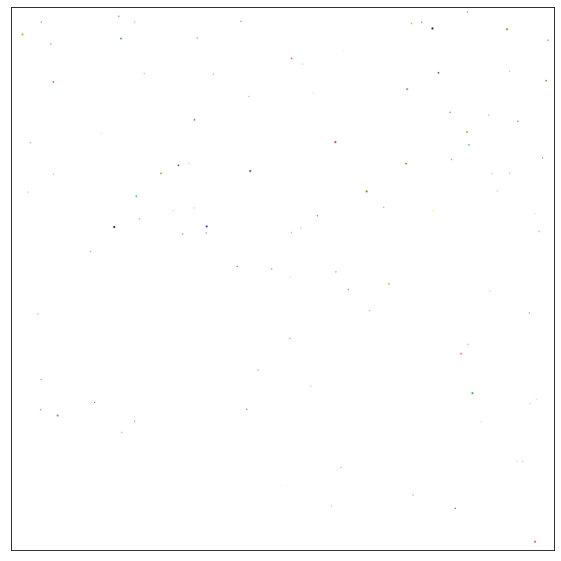

In [6]:
f, ax = plt.subplots(figsize=(10,10))
plot.plot_colony(x,time=35000)


# Assign mother cells

In [69]:
df = x.positions
df['mother_cell'] = -1
for ID in df[df.Timestep==0].ID.unique():
    idx = df[df['ID'] ==ID].index
    df.loc[idx,'mother_cell'] = ID
df

,Timestep,ID,type,radius,x,y,z,mother_cell
0,0,95,2,4.450000e-07,0.000025,0.000018,0.000002,95
1,0,11,1,9.600000e-07,0.000097,0.000027,0.000004,11
2,0,9,1,9.550000e-07,0.000193,0.000002,0.000005,9
3,0,85,2,4.845000e-07,0.000213,0.000014,0.000005,85
4,0,75,2,4.795000e-07,0.000125,0.000060,0.000005,75
...,...,...,...,...,...,...,...,...
1509472,35000,23090,2,4.200998e-07,0.000369,0.000451,0.000010,-1
1509473,35000,5557,2,4.937473e-07,0.000368,0.000452,0.000010,-1
1509474,35000,31029,2,4.517007e-07,0.000368,0.000452,0.000010,-1
1509475,35000,35847,2,4.201434e-07,0.000370,0.000452,0.000010,-1


In [68]:
ts = [100,200,300]
for time in ts:
    arr = df[df.Timestep==time][['x','y']].to_numpy()
    tree = KDTree(arr)
    dd, ii = tree.query(arr, k=2)
    s = pd.Series(ii[:,1],name='Neighbor')
    #s = pd.Series(df[df.Timestep==time].reset_index(drop=True).loc[ii[:,1],'ID'],name='Neighbor')
    #print(df[(df.Timestep==time)])
    #print(s)
    idx1 = df[df.Timestep==time].index
    s.index = idx1
    idx = df[(df['mother_cell'] ==-1) & (df.Timestep==time)].index
    df.loc[idx,'mother_cell'] = s[(df['mother_cell'] ==-1) & (df.Timestep==time)]
    print(df[(df.Timestep==time)])
    #print(ii[:,1],df[df.Timestep==time][['ID','mother_cell']])
    #print(df.loc[idx,'mother_cell']) #= s[(df['mother_cell'] ==-1) & (df.Timestep==time)]
    #print(pd.concat([df[df.Timestep==time][['ID','mother_cell']].sort_values(by='ID'),s],ignore_index=True))
    #print(df[(df['mother_cell'] ==-1) & (df.Timestep==time)][['ID','mother_cell']].sort_values(by='ID'))
#s = pd.Series(ii[:,1],index=df[df.Timestep==1000].index)


     Timestep   ID  type        radius         x         y         z  \
99        100   95     2  4.418830e-07  0.000025  0.000018  0.000002   
100       100   11     1  9.645286e-07  0.000097  0.000027  0.000004   
101       100    9     1  9.595050e-07  0.000193  0.000002  0.000005   
102       100   85     2  4.811057e-07  0.000213  0.000014  0.000005   
103       100   75     2  4.761421e-07  0.000125  0.000060  0.000005   
..        ...  ...   ...           ...       ...       ...       ...   
196       100   52     2  4.423813e-07  0.000408  0.000463  0.000005   
197       100   91     2  4.468499e-07  0.000369  0.000451  0.000005   
198       100   18     1  7.686087e-07  0.000481  0.000494  0.000006   
199       100  101     2  4.307591e-07  0.000301  0.000426  0.000002   
200       100  102     2  4.201462e-07  0.000468  0.000421  0.000005   

     mother_cell  
99            95  
100           11  
101            9  
102           85  
103           75  
..           ...  
19

In [40]:
arr = df[df.Timestep==1000][['x','y']].to_numpy()
tree = KDTree(arr)
dd, ii = tree.query(arr, k=2)
dd[:,1],ii[:,1]

(array([1.51795916e-05, 1.41743030e-06, 1.31605262e-06, 1.41743030e-06,
        2.29399862e-05, 4.29467344e-05, 3.41760150e-05, 1.31605262e-06,
        3.40219476e-05, 4.00169964e-05, 1.99022612e-05, 1.54958606e-06,
        3.50202798e-05, 1.54958606e-06, 1.51795916e-05, 1.34321443e-05,
        5.72349544e-05, 1.34321443e-05, 5.85491247e-05, 2.56766431e-05,
        1.89736660e-05, 1.00498756e-05, 4.15823280e-05, 3.40219047e-05,
        3.22948912e-05, 1.36014705e-05, 1.04521881e-06, 1.70000000e-05,
        3.22948912e-05, 1.00498756e-05, 1.04521881e-06, 3.50570963e-05,
        1.36014705e-05, 1.36014705e-05, 1.81107703e-05, 1.89736660e-05,
        1.36014705e-05, 3.53411941e-05, 2.45568728e-05, 1.98567369e-05,
        3.53411941e-05, 3.76198086e-05, 5.70897539e-05, 1.11803399e-05,
        1.11803399e-05, 1.98567369e-05, 1.58113883e-05, 2.96966328e-05,
        2.82842712e-05, 3.52567724e-05, 2.89243111e-05, 2.99917072e-05,
        3.70129707e-05, 3.43182496e-05, 1.87882942e-05, 1.308625

In [41]:
df[df.Timestep==1000].reset_index(drop=True).loc[ii[:,1],'ID'].values

array([ 15,  11,   9, 104, 105,  11,  53, 105,   9,  48,  95,  27,  99,
       103,  95,  93,  44,  58,  87,  33,  33,   1,  44,  16,  30,  42,
        61,  90,  44,  71, 100,  50,  87,  19,  19,   8,  86,  40,  82,
        24,  34,  24,  68,  97,  63,  82,   2,  54,  92,  51, 107,  22,
        54, 106,   2,  80,  80,  13,  54,  10,  17,  73,  17, 106,  31,
       107,   5,   6,  46,  65,  78,  14,   5,  55, 108,  28,  46,  20,
         6,  35,  74,  45,  50,  74,  72,  47,  34,  35,  94,  76,  77,
        67,  39,  34,  57,  38,  12,  37, 101, 102, 101,  56,  89,  26,
        56,  91,  52, 102])

In [43]:
df[(df['mother_cell'] ==-1) & (df.Timestep==1000)]
#s = pd.Series(ii[:,1],index=df[df.Timestep==1000].index)
s = pd.Series(df[df.Timestep==1000].reset_index(drop=True).loc[ii[:,1],'ID'].values)
idx = df[(df['mother_cell'] ==-1) & (df.Timestep==1000)].index
df.loc[idx,'mother_cell'] = s[(df['mother_cell'] ==-1) & (df.Timestep==1000)]
df[(df.Timestep==1000) & (df.ID != df.mother_cell)]

,Timestep,ID,type,radius,x,y,z,mother_cell
1036,1000,95,2,4.149440e-07,0.000025,0.000018,0.000002,95.0
1037,1000,104,1,7.596199e-07,0.000097,0.000026,0.000003,NaN
1038,1000,105,1,7.482797e-07,0.000194,0.000002,0.000004,NaN
1039,1000,11,1,8.342320e-07,0.000098,0.000027,0.000004,11.0
1040,1000,85,2,4.517554e-07,0.000213,0.000014,0.000005,85.0
...,...,...,...,...,...,...,...,...
1139,1000,76,2,4.390973e-07,0.000433,0.000381,0.000005,76.0
1140,1000,102,2,3.944598e-07,0.000468,0.000421,0.000005,NaN
1141,1000,52,2,4.153310e-07,0.000408,0.000463,0.000005,52.0
1142,1000,91,2,4.195207e-07,0.000369,0.000451,0.000005,91.0


In [44]:
s

0       15
1       11
2        9
3      104
4      105
      ... 
103     26
104     56
105     91
106     52
107    102
Length: 108, dtype: int32

In [82]:
df = x.positions
df['mother_cell'] = -1
for ID in df[df.Timestep==0].ID.unique():
    idx = df[df['ID'] ==ID].index
    df.loc[idx,'mother_cell'] = ID
df
for time in df.Timestep.unique():
    arr = df[df.Timestep==time][['x','y']].to_numpy()
    tree = KDTree(arr)
    dd, ii = tree.query(arr, k=2)
    s = pd.Series(ii[:,1],name='Neighbor')
    idx1 = df[df.Timestep==time].index
    s.index = idx1
    idx = df[(df['mother_cell'] ==-1) & (df.Timestep==time)].index
    df.loc[idx,'mother_cell'] = s.loc[idx]
    #s = pd.Series(ii[:,1],index=df[df.Timestep==time].index)
    #s = pd.Series(df[df.Timestep==time].reset_index(drop=True).loc[ii[:,1],'ID'].values)
    #idx = df[(df['mother_cell'] ==-1) & (df.Timestep==time)].index
    #df.loc[idx,'mother_cell'] = s[(df['mother_cell'] ==-1) & (df.Timestep==time)]
#df.mother_cell = df.mother_cell.astype('Int64')

In [81]:
s.loc[idx]

1463459      810
1463460     4728
1463461      371
1463462      818
1463463     2296
           ...  
1509472    44803
1509473    45690
1509474    45515
1509475    44213
1509476    42391
Name: Neighbor, Length: 45920, dtype: int64

In [76]:

def plot_colony(df,ts):
    timepoint = ts
    scale = 1
    tp = df[df.Timestep == timepoint]
    img_size = 2000
    bk = 255 * np.ones(shape=[img_size, img_size, 3], dtype=np.uint8)

    N = 100
    red = np.ones((N, 3))
    red[:, 0] = 255
    red[:, 1] = np.linspace(0, 255,N,dtype=int)
    red[:, 2] = np.linspace(65, 255,N,dtype=int)

    green = np.ones((N, 3))
    green[:, 0] = np.linspace(65, 255,N,dtype=int)
    green[:, 2] = np.linspace(0, 255,N,dtype=int)
    green[:, 1] = 255

    for i, colony in enumerate(tp.mother_cell.unique()):
        colors = tuple(np.random.randint(0,256, 3).astype('int'))
        for cell in tp[tp.mother_cell==colony].itertuples():
            #print(cell)
            
            xloc = round(cell[5]/x.metadata['Dimensions'][0]*img_size)
            yloc = round(cell[6]/x.metadata['Dimensions'][1]*img_size)
            radius = round(cell[4]/x.metadata['Dimensions'][0]*img_size*scale)
            
            cv2.circle(bk,center = (xloc,yloc),radius = radius,color = (int(colors[0]),int(colors[1]),int(colors[2])),thickness = -1)
    f, ax = plt.subplots(figsize=(15,15))
    ax.imshow(bk)
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    #ax.set_axis_off()


In [74]:
df[df.Timestep==10000]

,Timestep,ID,type,radius,x,y,z,mother_cell
13447,10000,95,2,2.475879e-07,0.000025,0.000018,0.000002,95
13448,10000,104,1,9.324899e-07,0.000096,0.000027,0.000003,4
13449,10000,164,1,8.923117e-07,0.000192,0.000002,0.000004,11
13450,10000,149,1,8.767597e-07,0.000194,0.000002,0.000004,12
13451,10000,146,1,9.089610e-07,0.000097,0.000025,0.000004,8
...,...,...,...,...,...,...,...,...
13629,10000,52,2,2.459211e-07,0.000408,0.000463,0.000005,52
13630,10000,91,2,2.484002e-07,0.000369,0.000451,0.000005,91
13631,10000,187,1,7.449618e-07,0.000480,0.000494,0.000006,186
13632,10000,18,1,9.568685e-07,0.000482,0.000494,0.000007,18


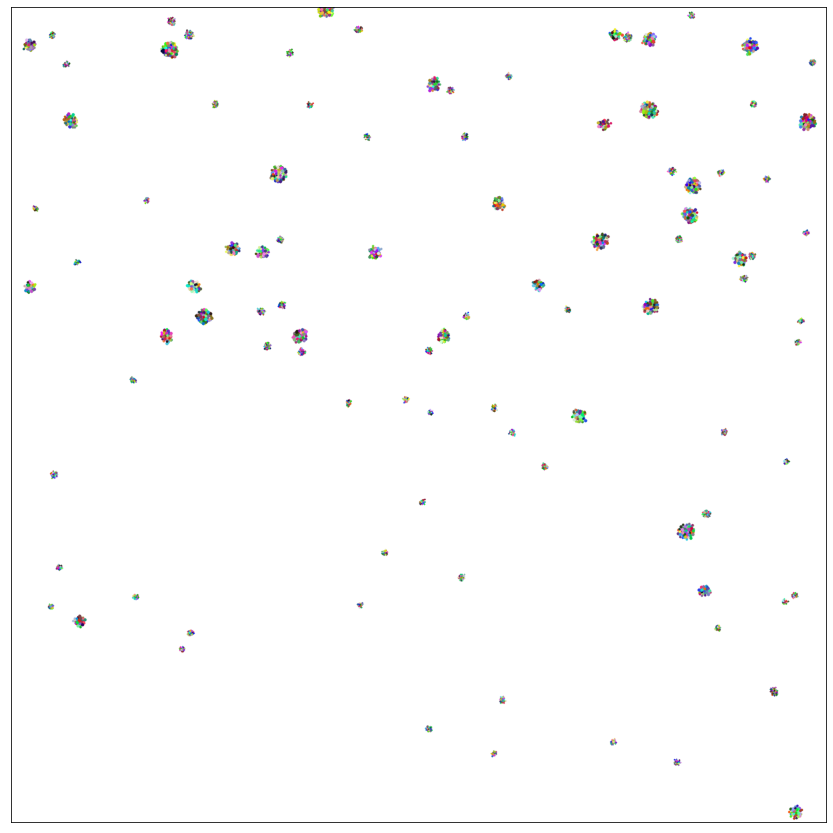

In [83]:
plot_colony(df,30000)

In [47]:
x.colonies

,Timestep,ID,type,radius,x,y,z,mother_cell
0,0,95,2,4.450000e-07,0.000025,0.000018,0.000002,95.0
1,0,11,1,9.600000e-07,0.000097,0.000027,0.000004,11.0
2,0,9,1,9.550000e-07,0.000193,0.000002,0.000005,9.0
3,0,85,2,4.845000e-07,0.000213,0.000014,0.000005,85.0
4,0,75,2,4.795000e-07,0.000125,0.000060,0.000005,75.0
...,...,...,...,...,...,...,...,...
1509472,35000,23090,2,4.200998e-07,0.000369,0.000451,0.000010,-1.0
1509473,35000,5557,2,4.937473e-07,0.000368,0.000452,0.000010,-1.0
1509474,35000,31029,2,4.517007e-07,0.000368,0.000452,0.000010,-1.0
1509475,35000,35847,2,4.201434e-07,0.000370,0.000452,0.000010,-1.0


<ipython-input-52-28ba9bc16e09>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots(figsize=(15,15))


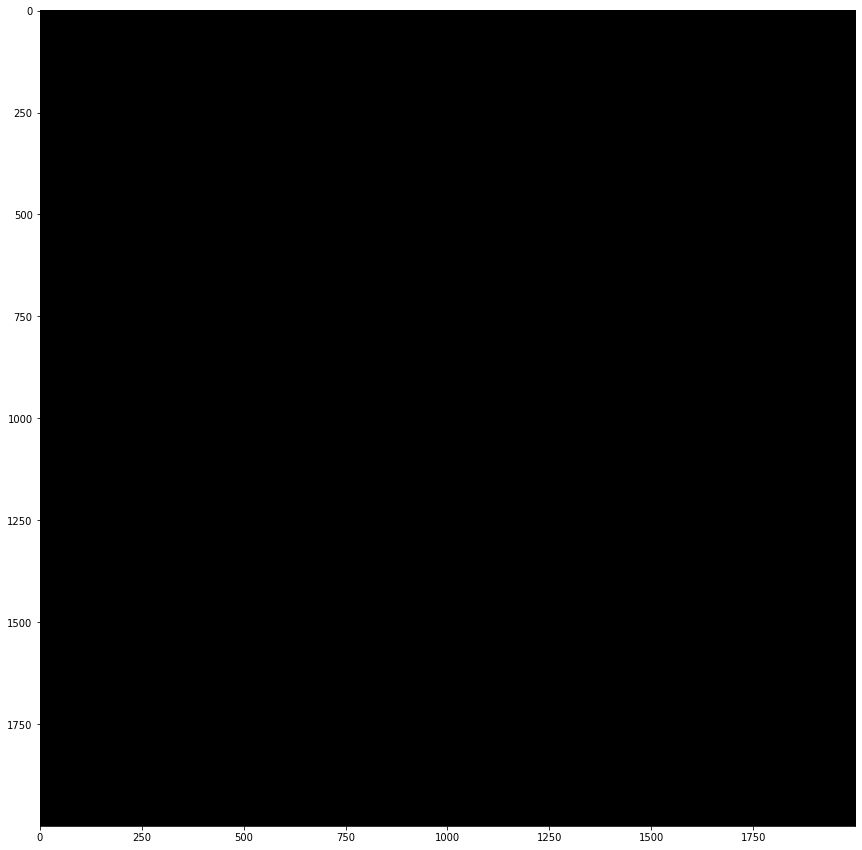

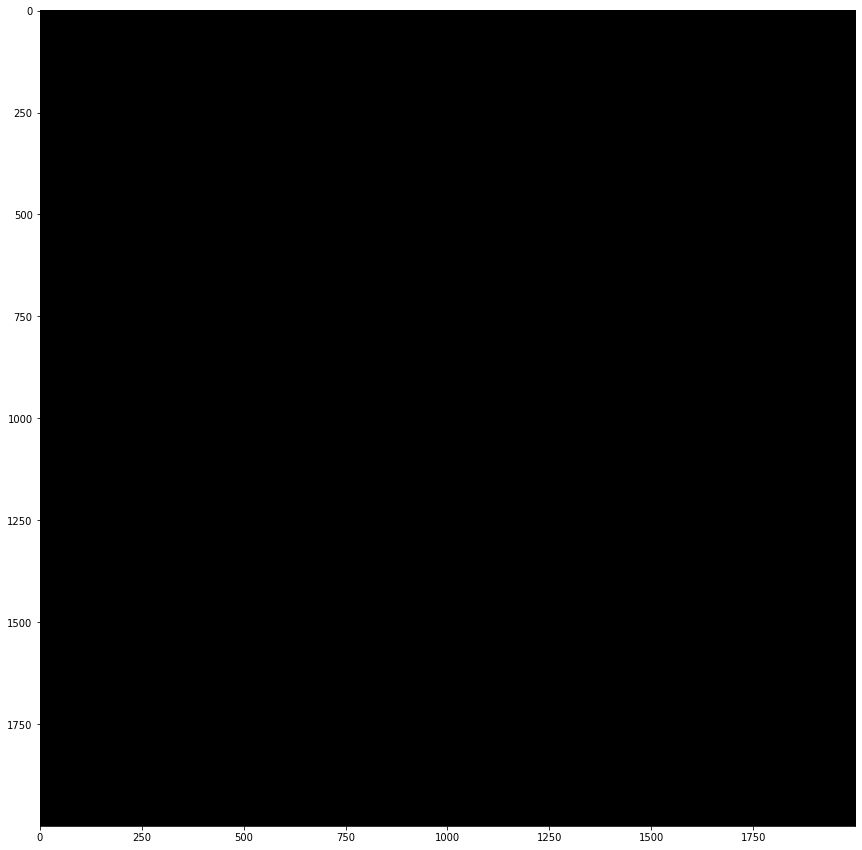

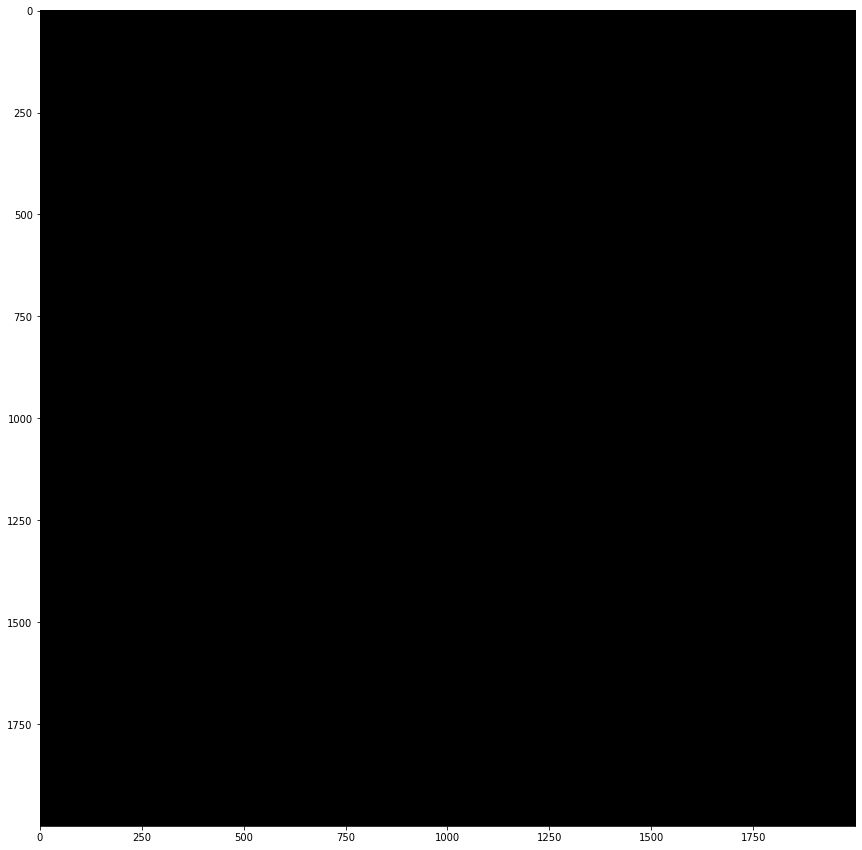

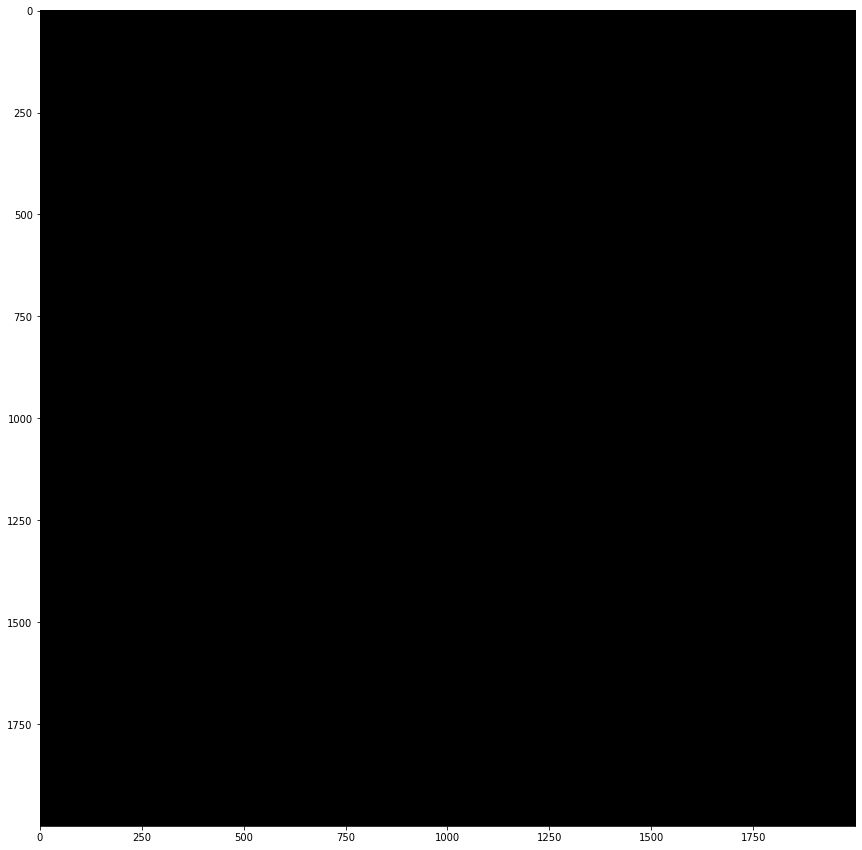

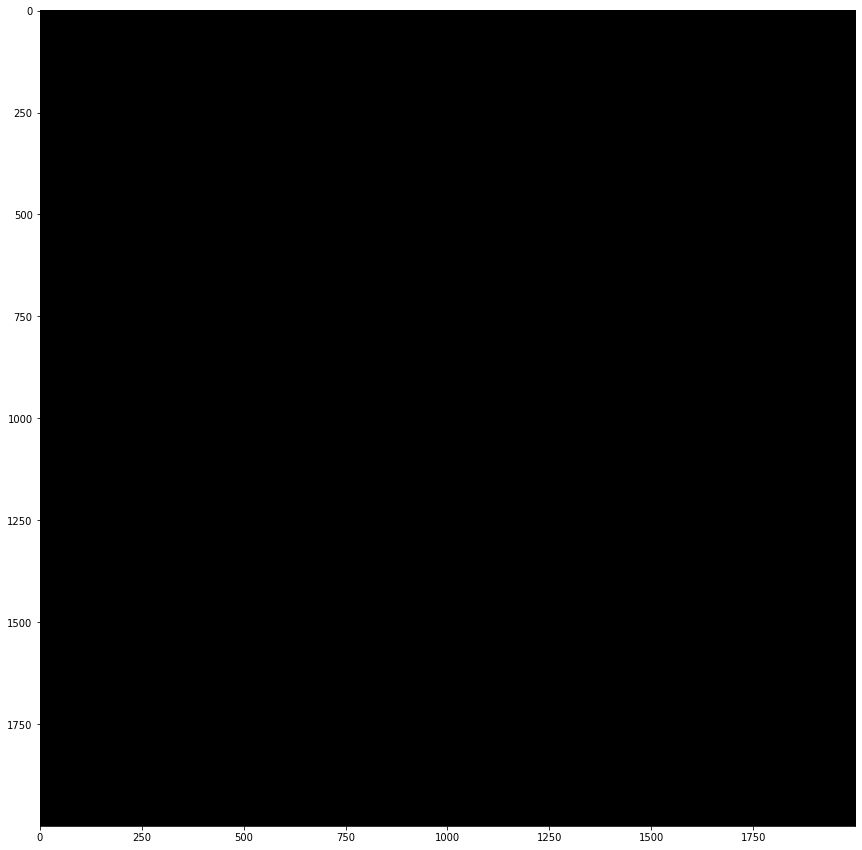

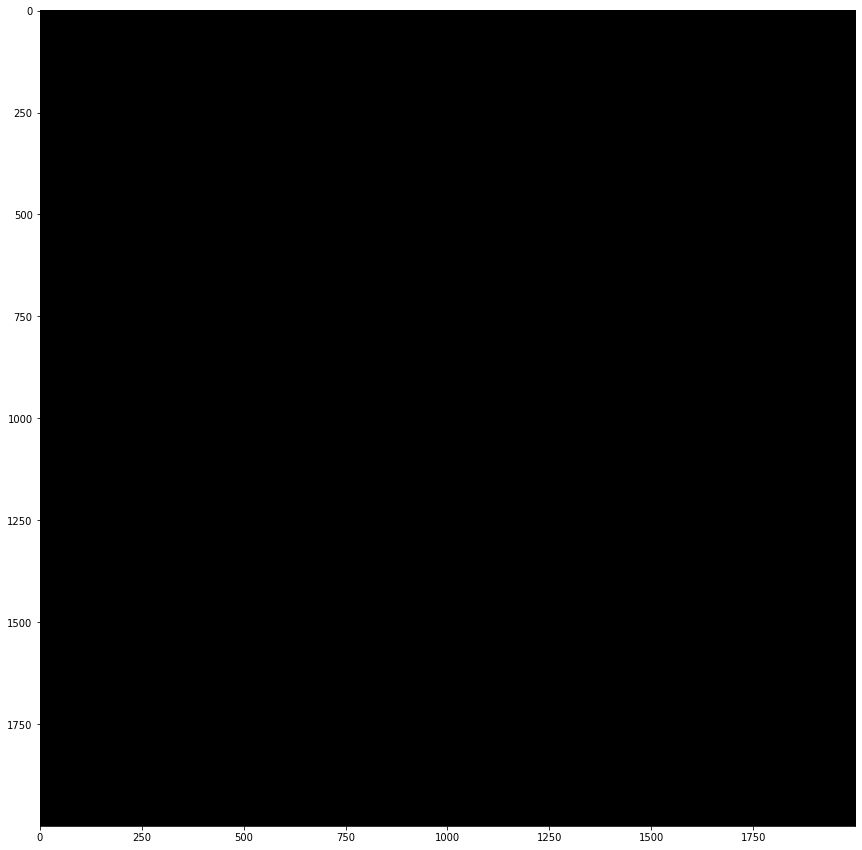

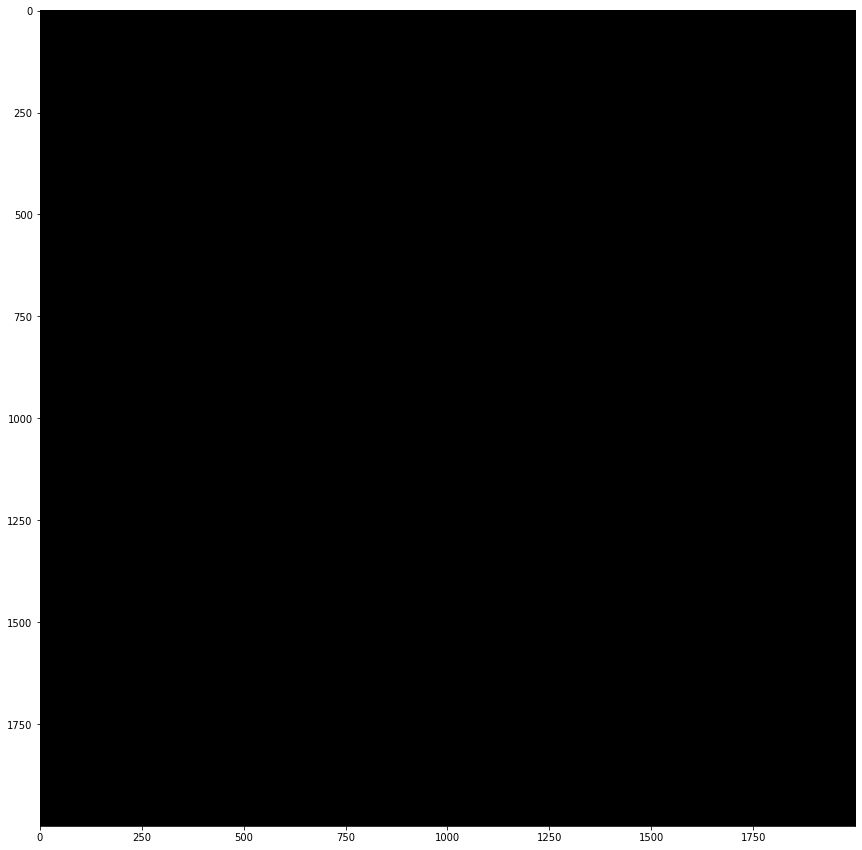

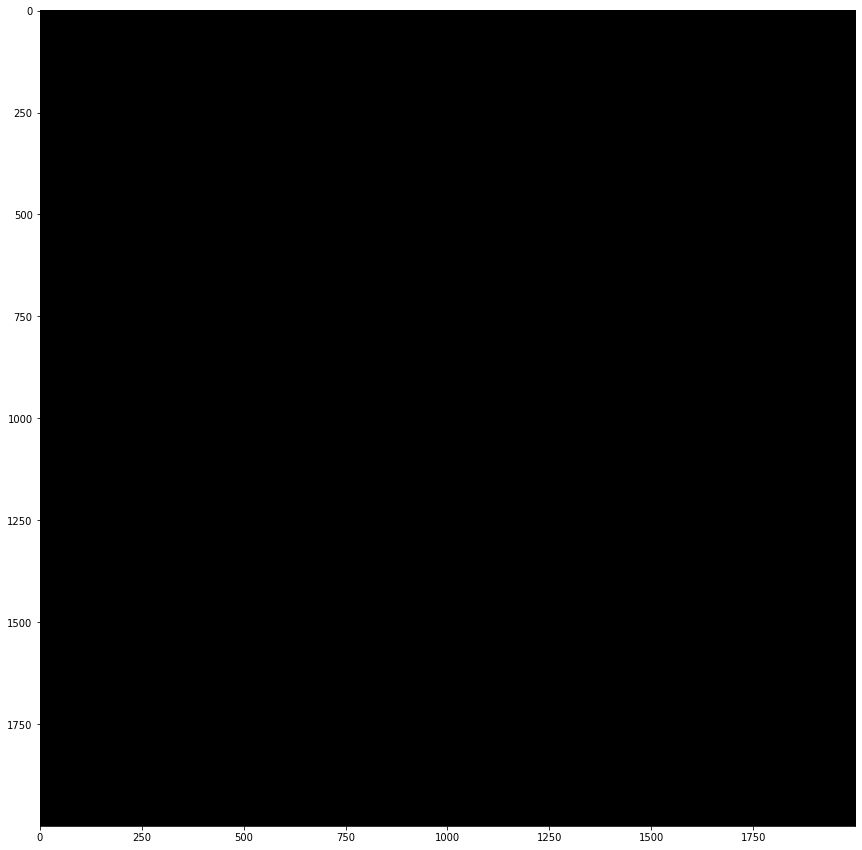

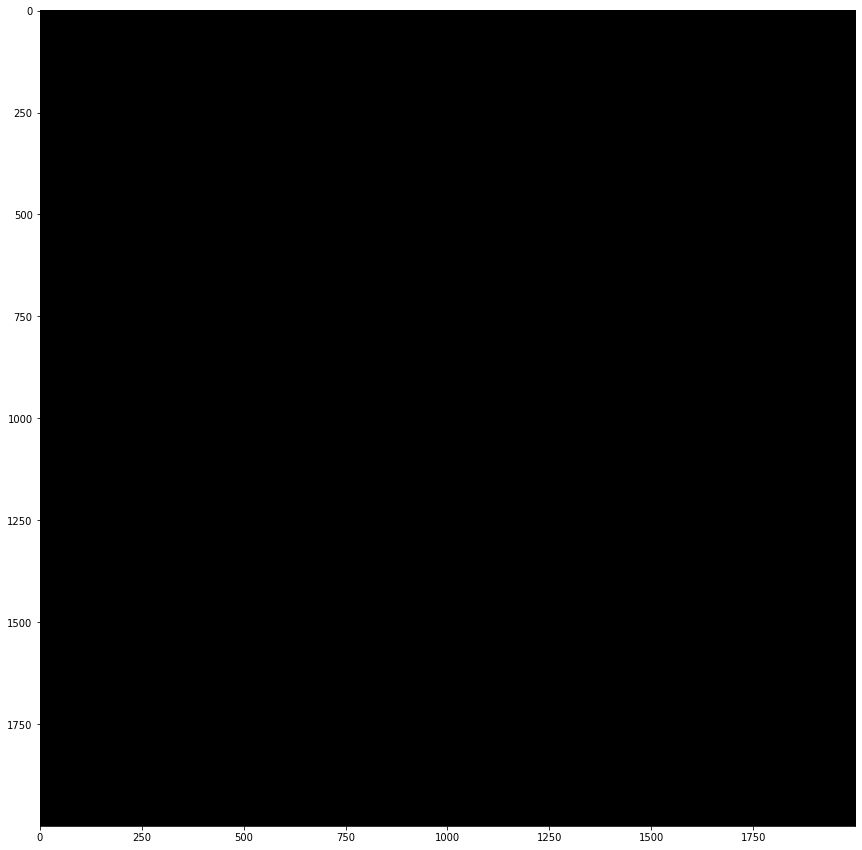

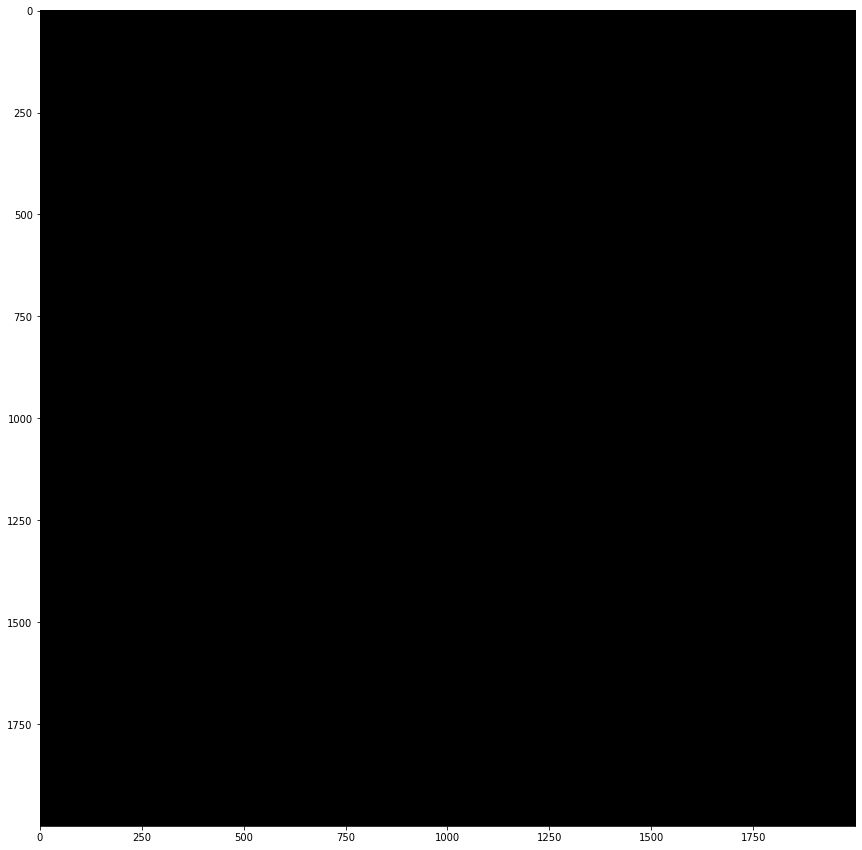

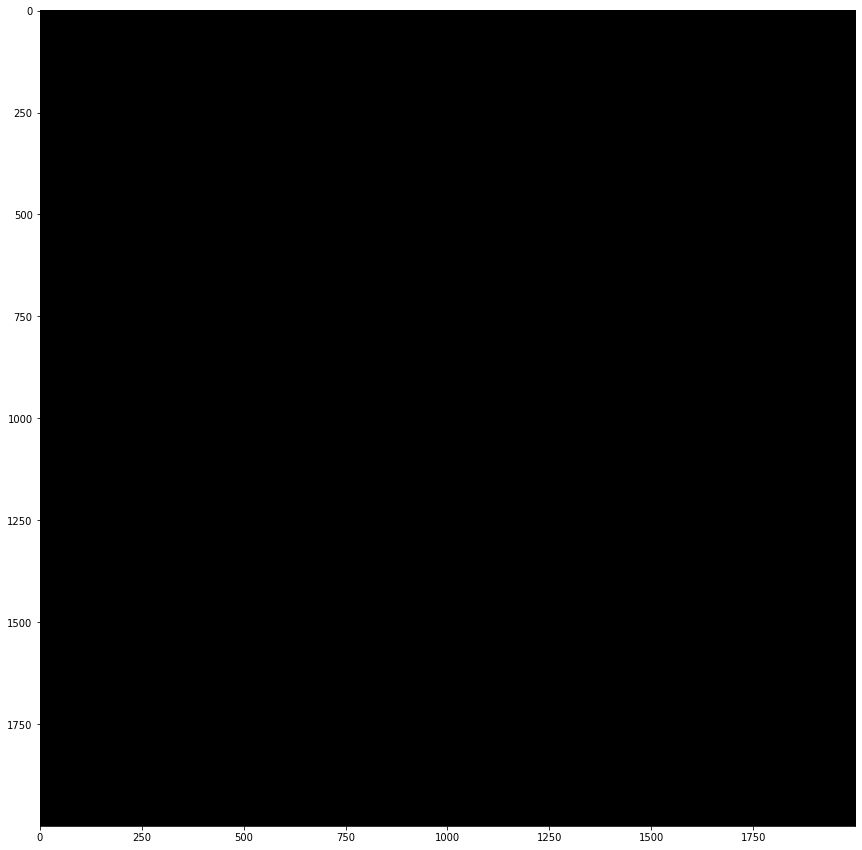

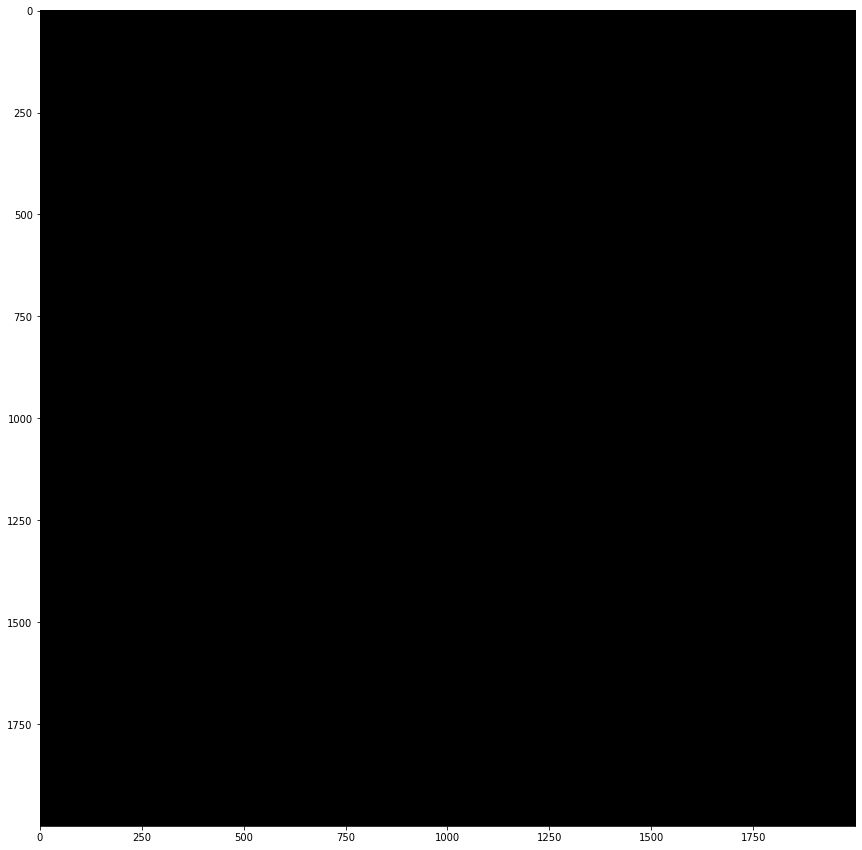

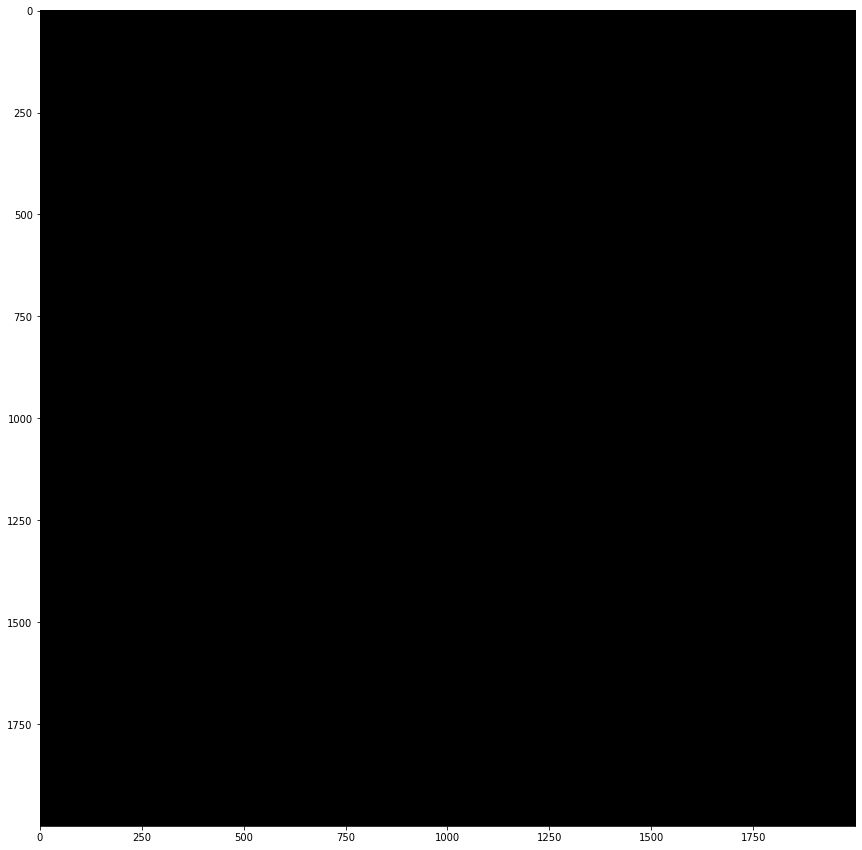

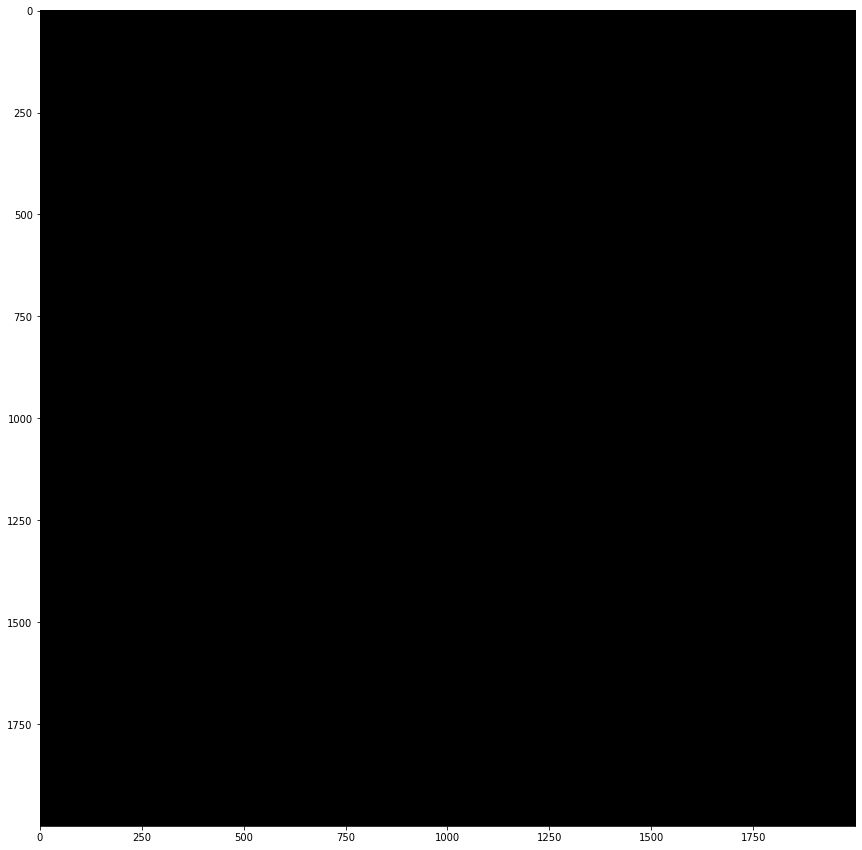

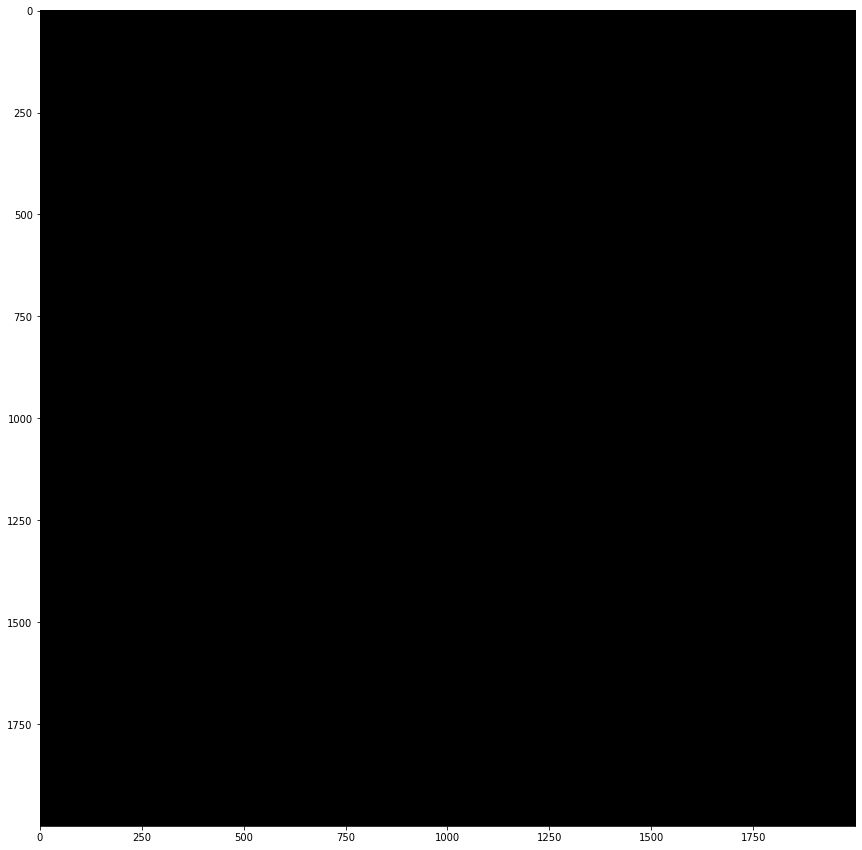

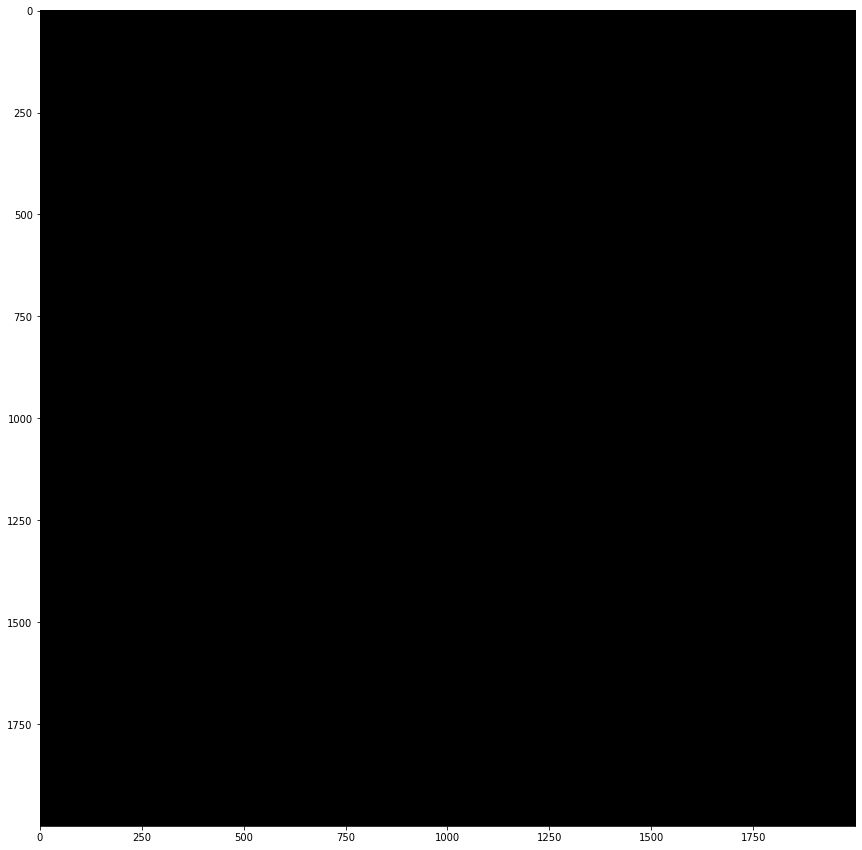

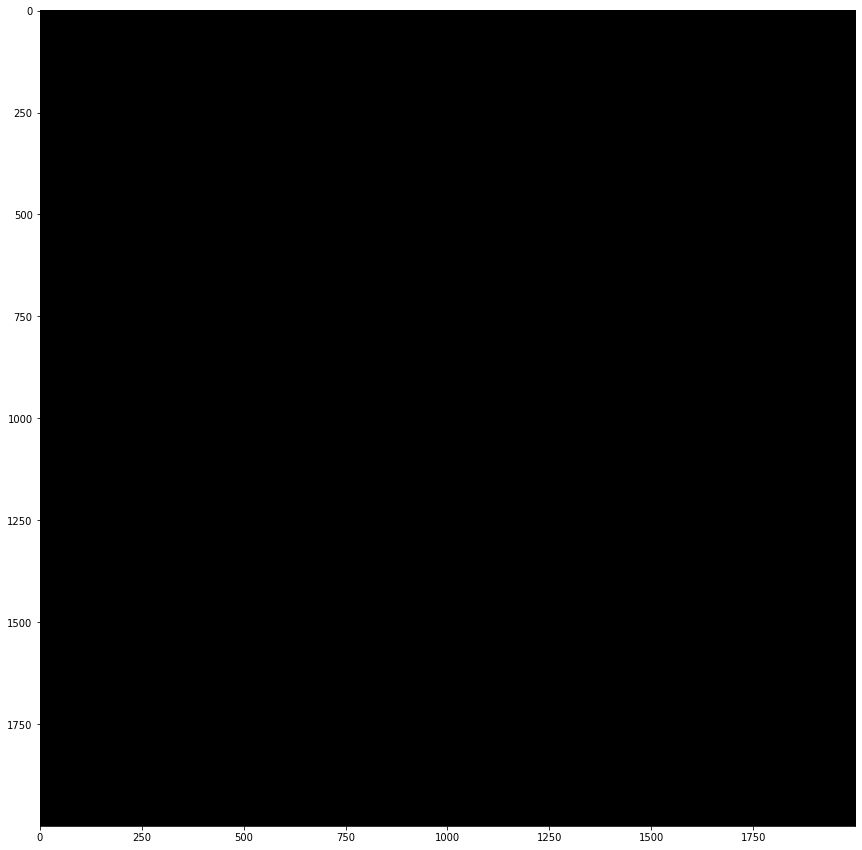

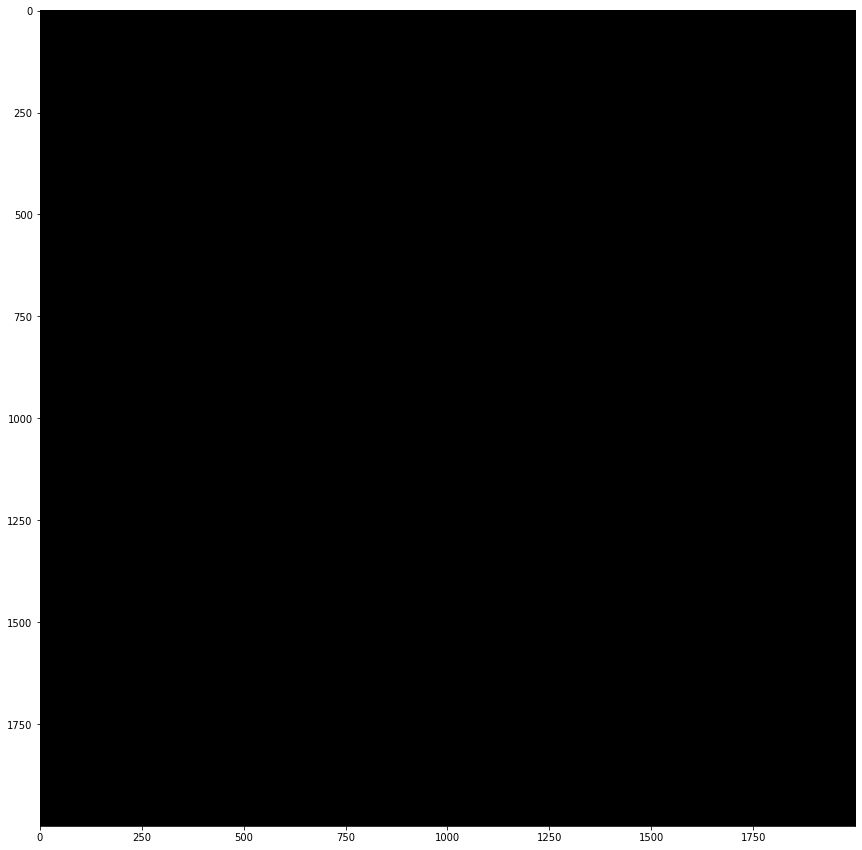

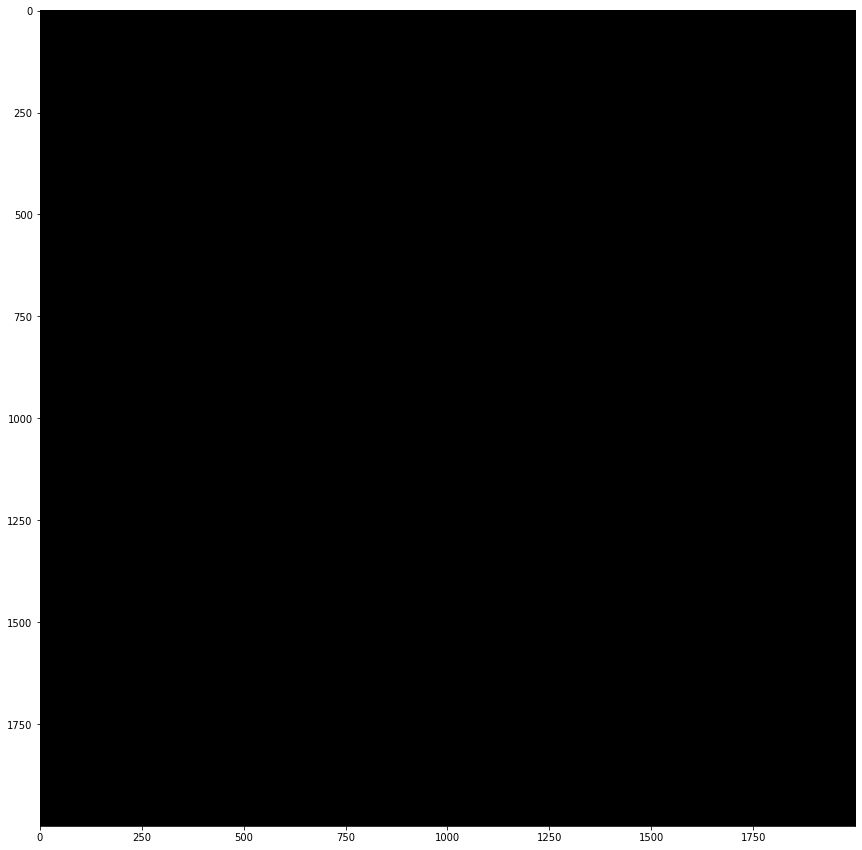

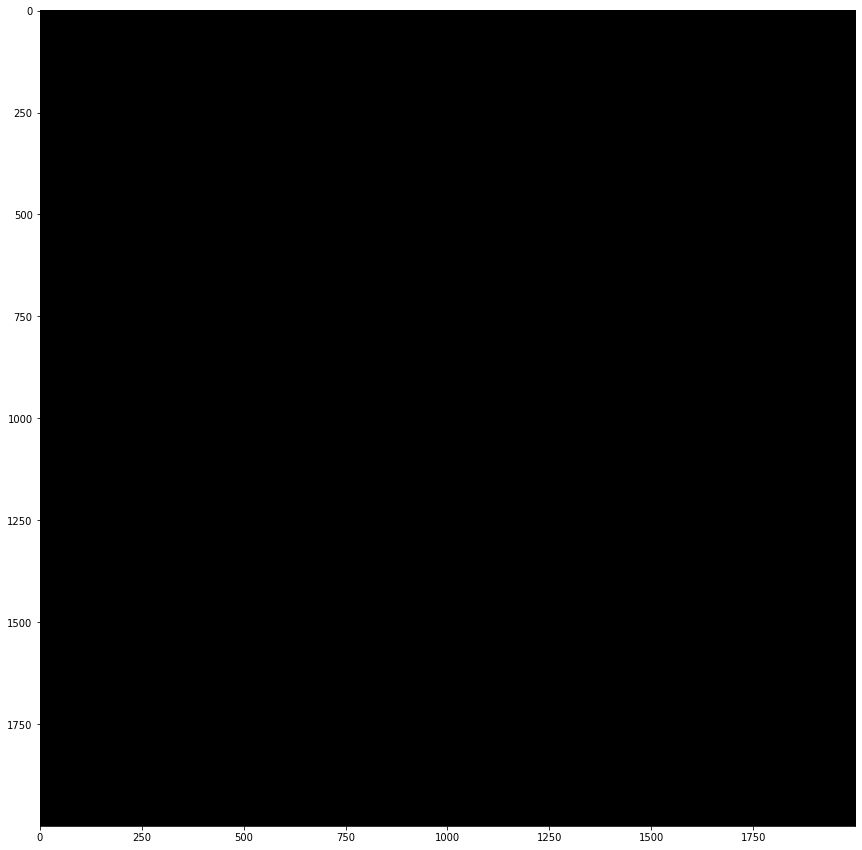

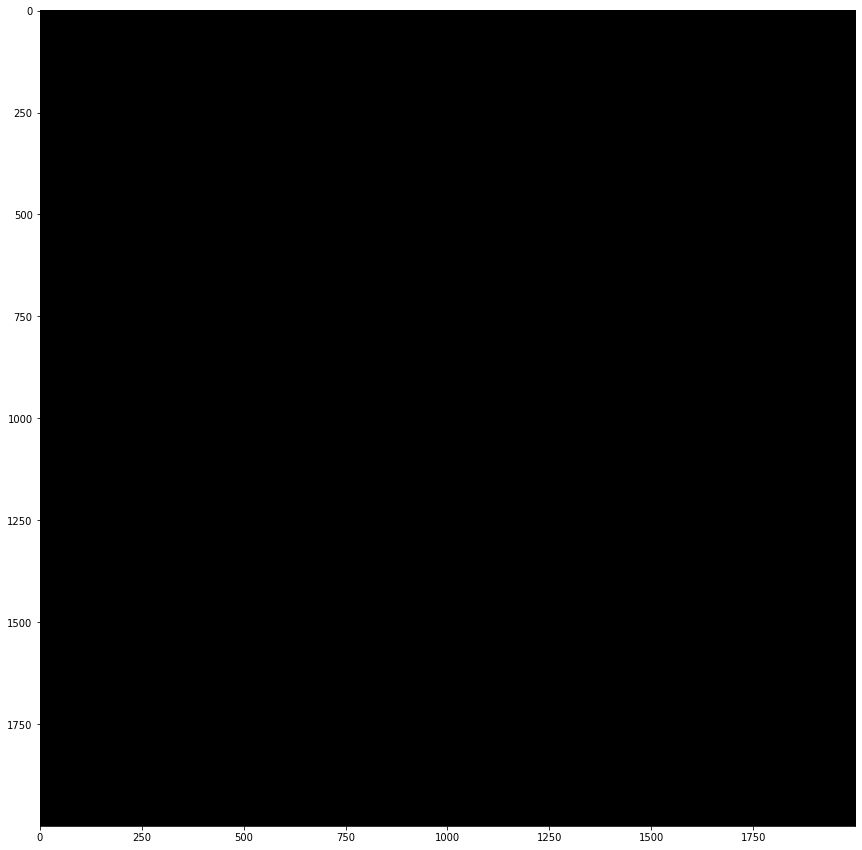

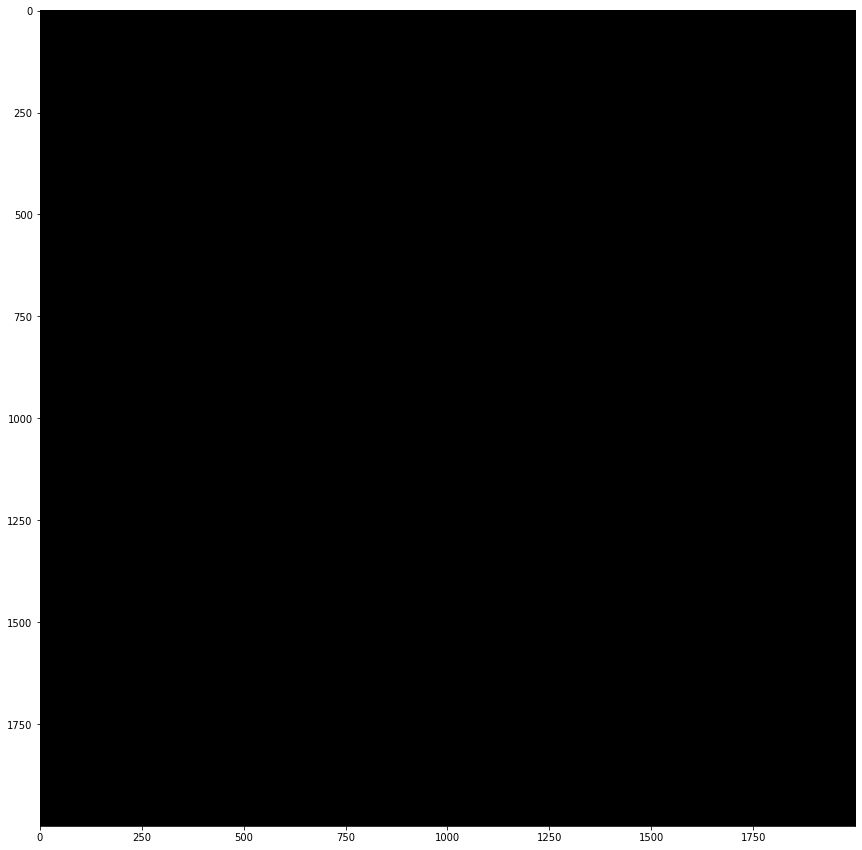

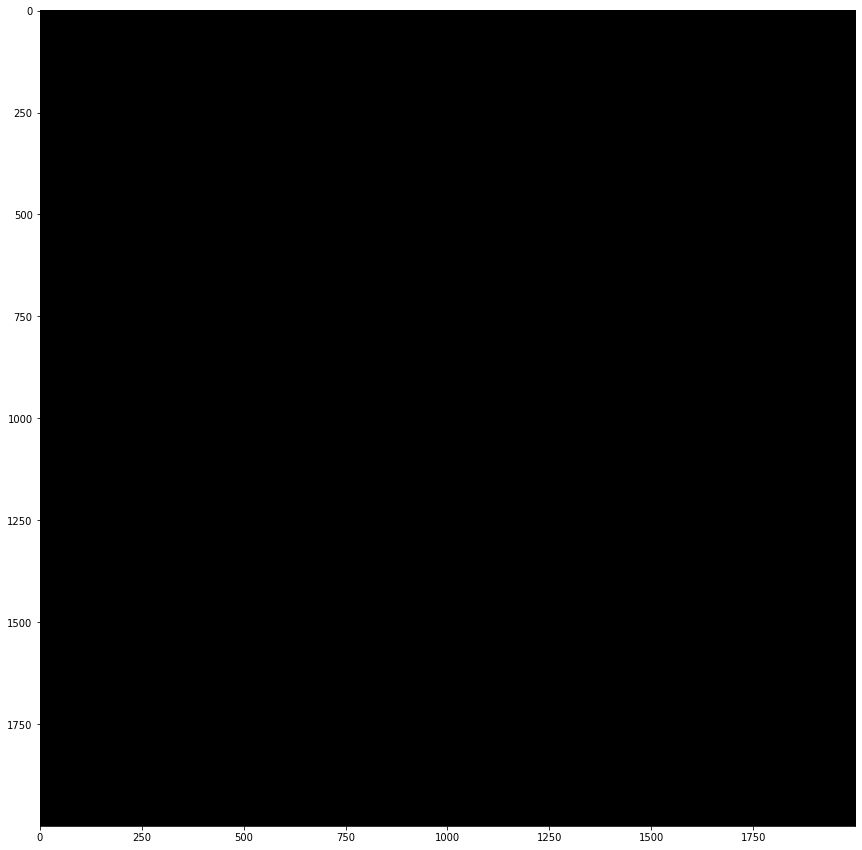

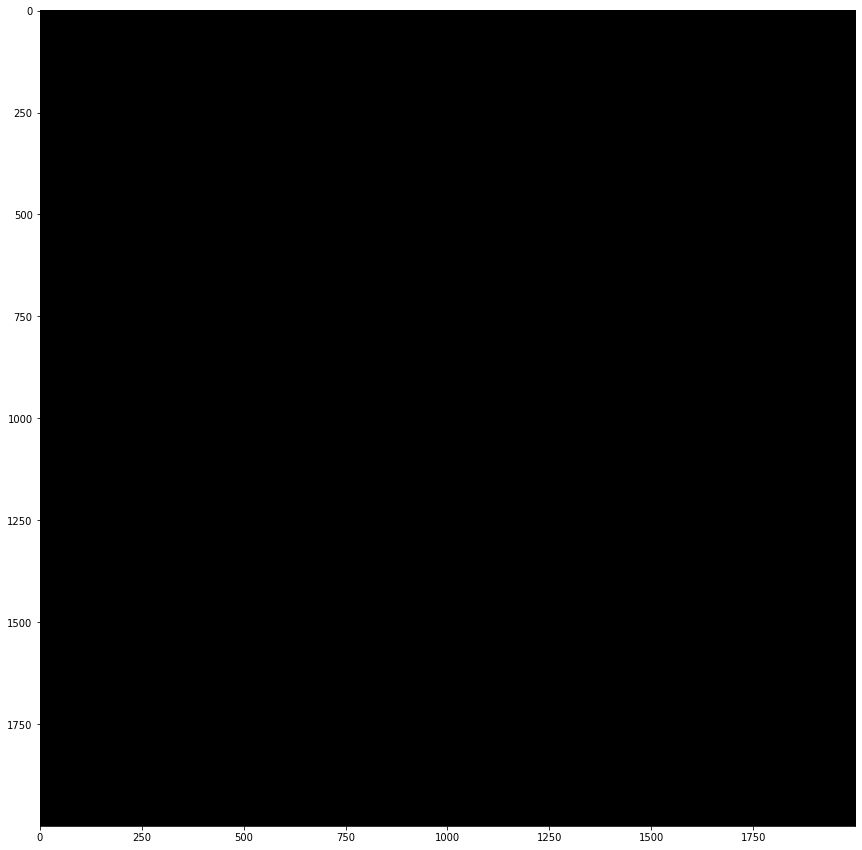

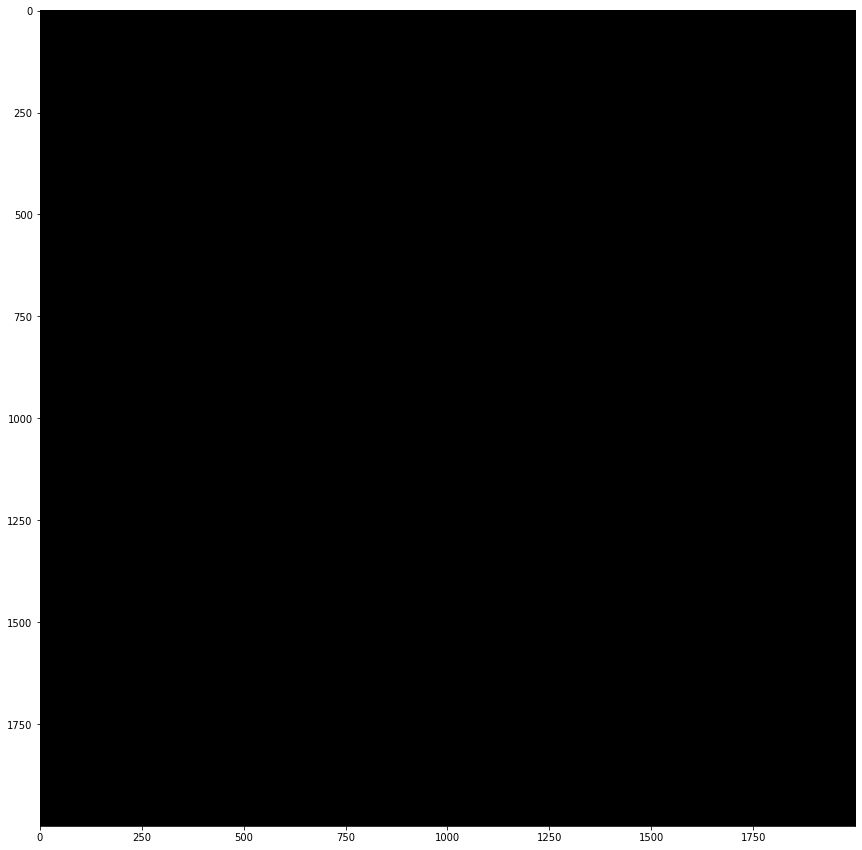

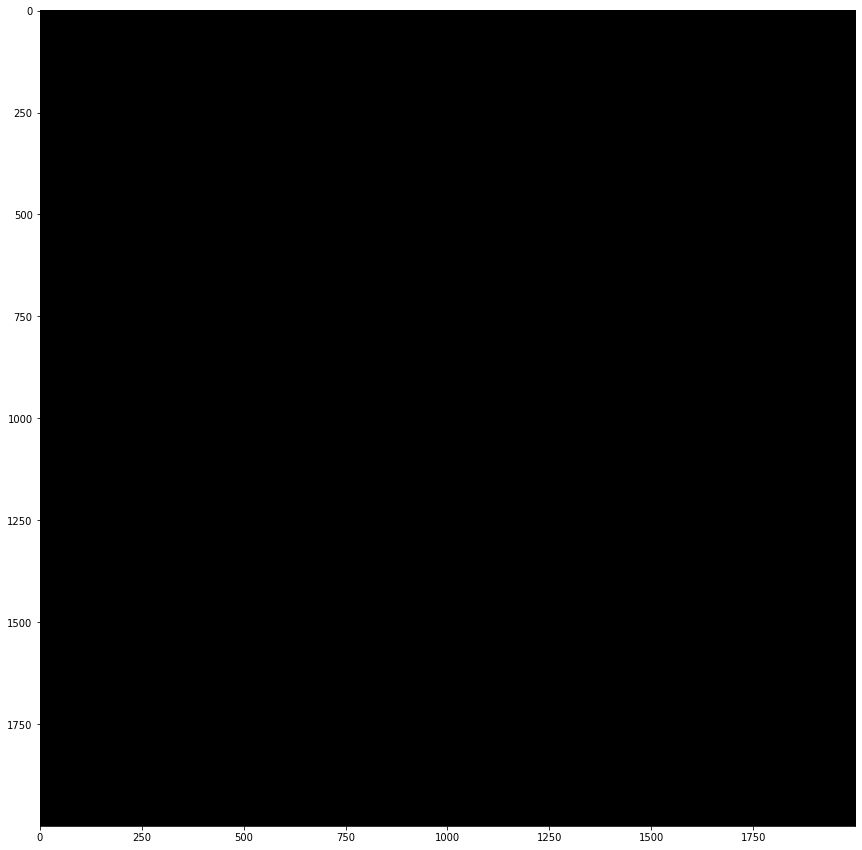

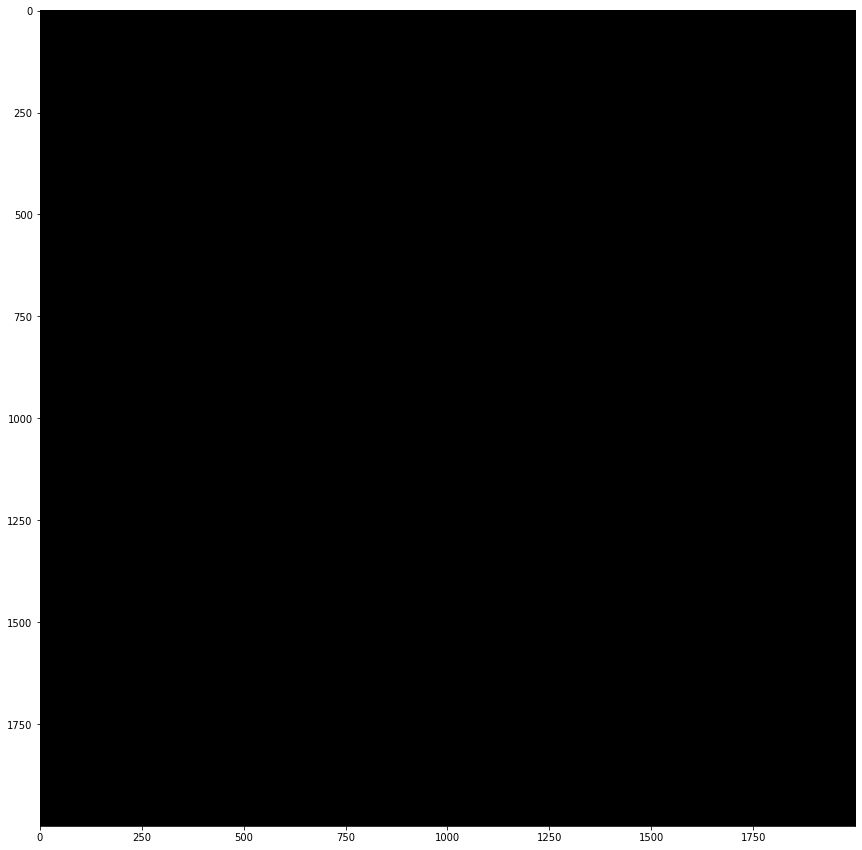

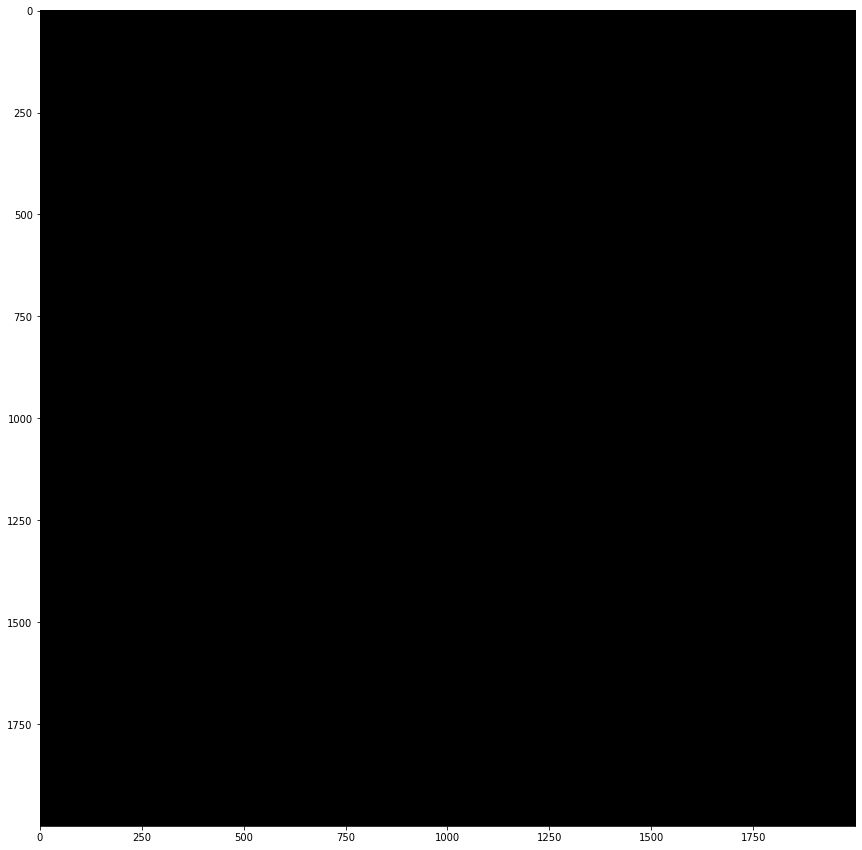

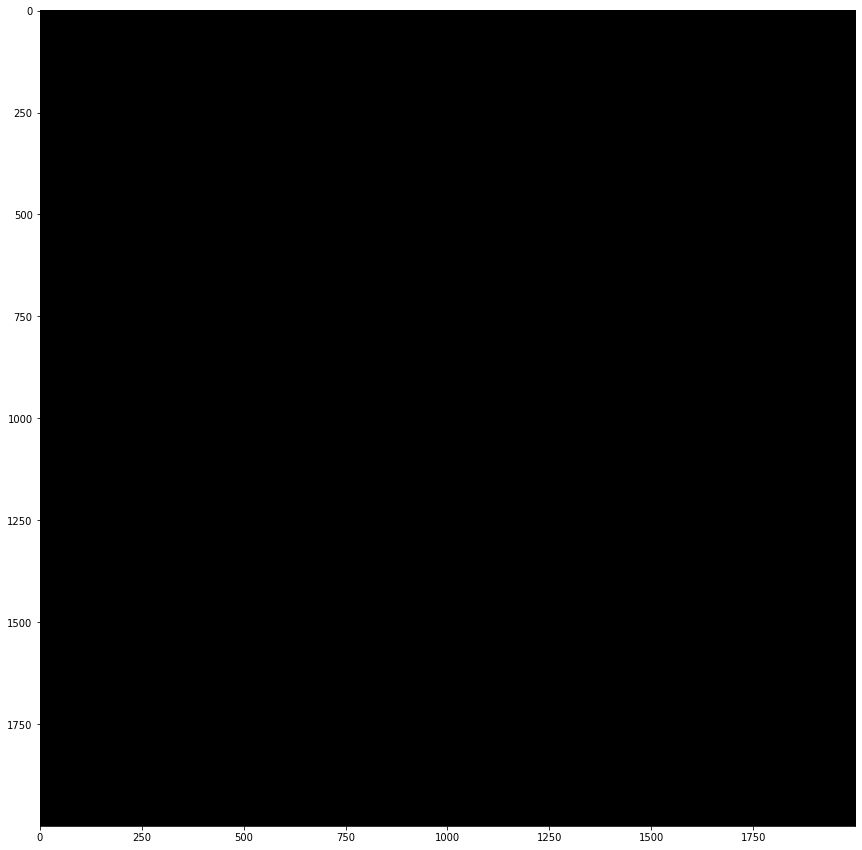

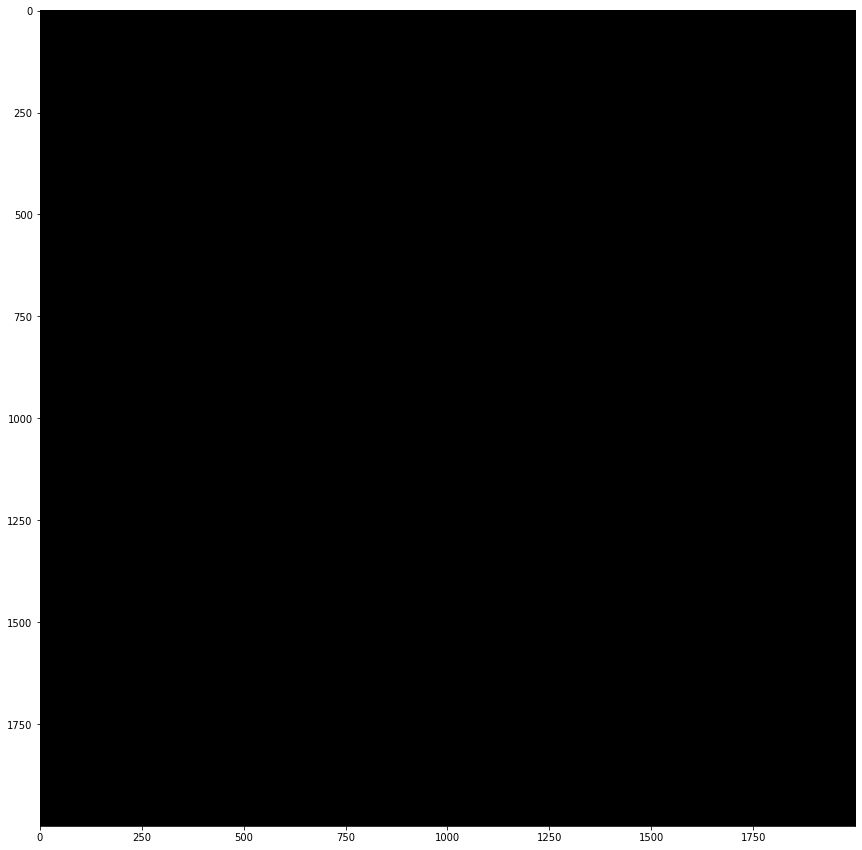

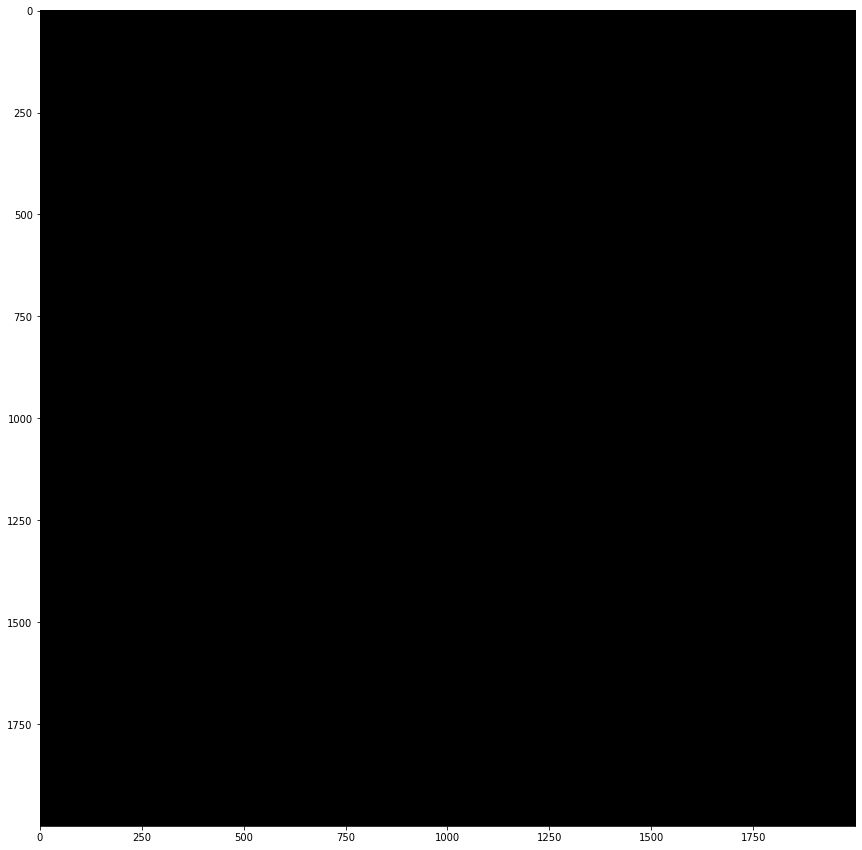

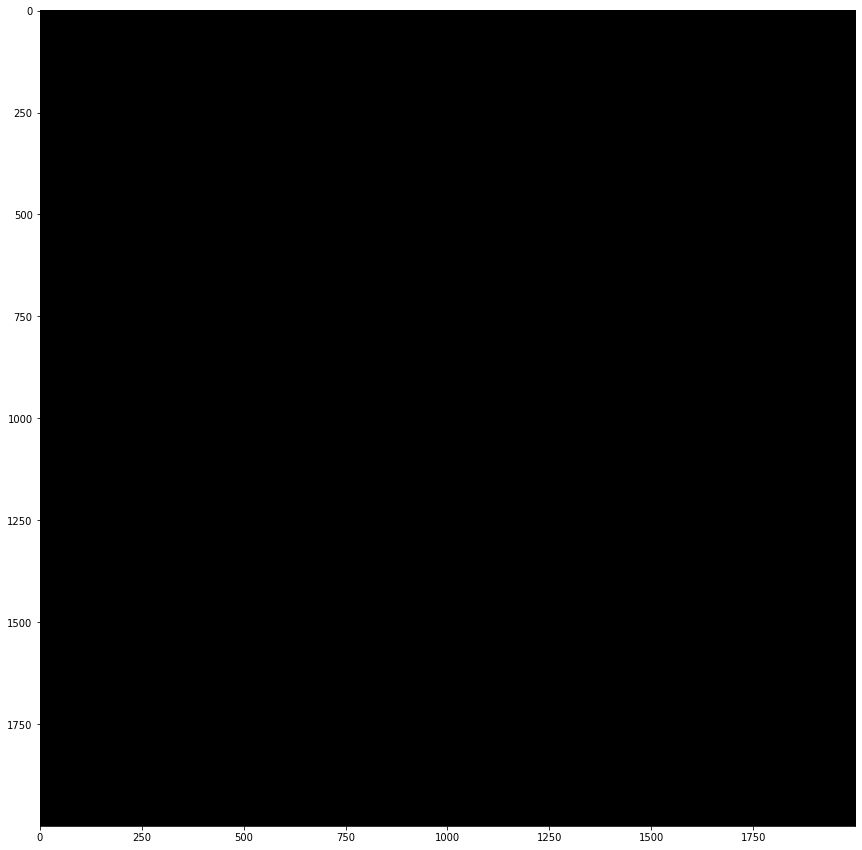

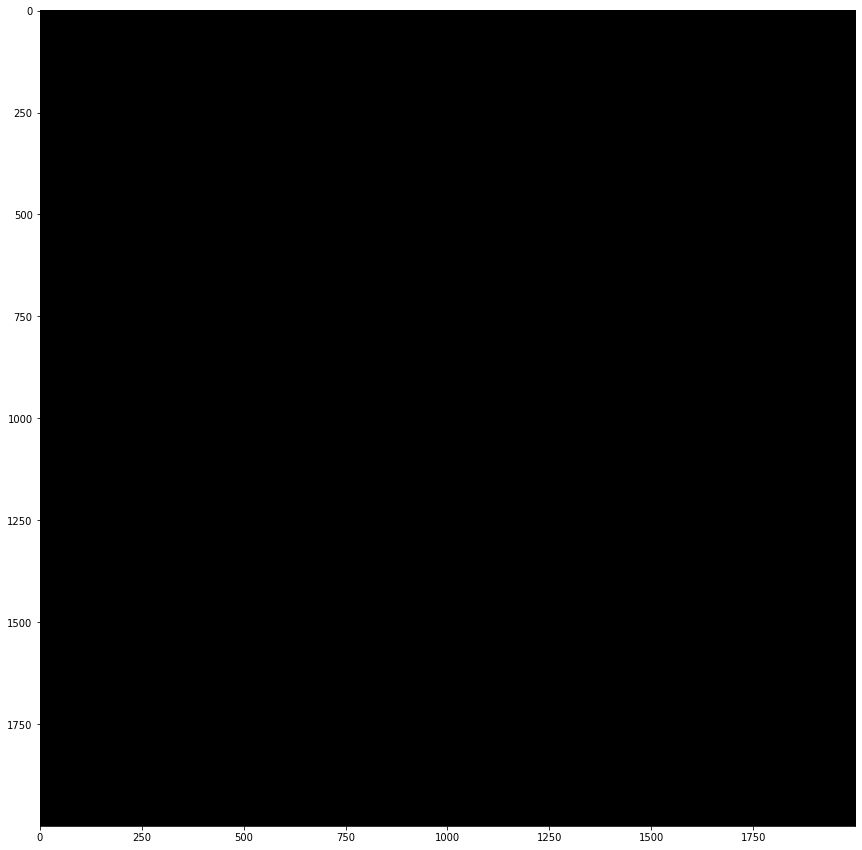

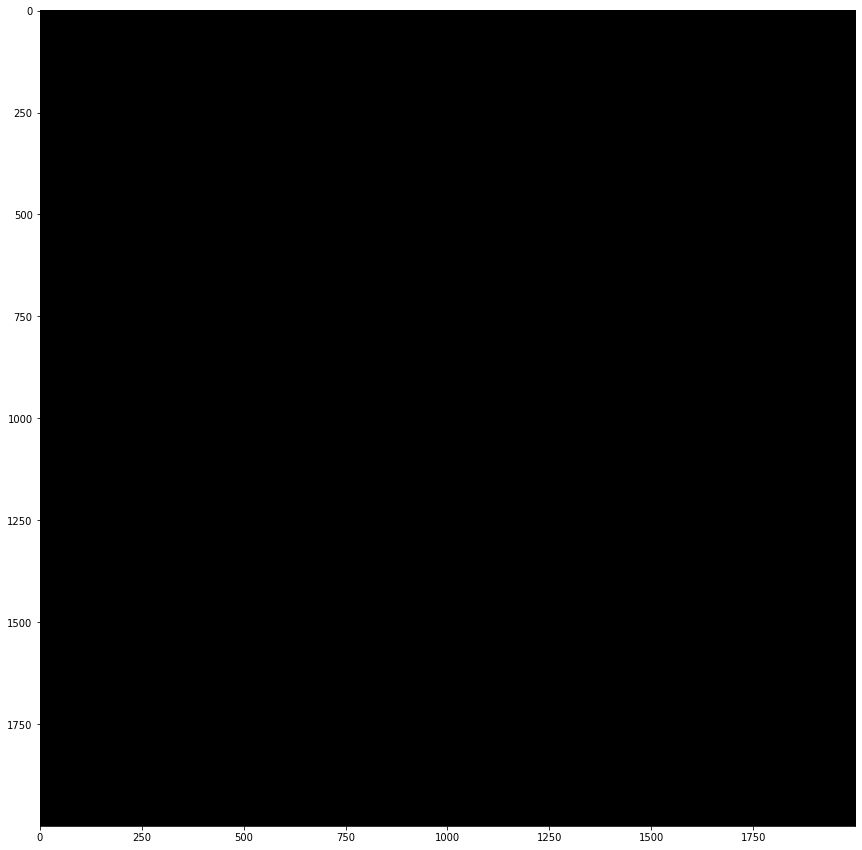

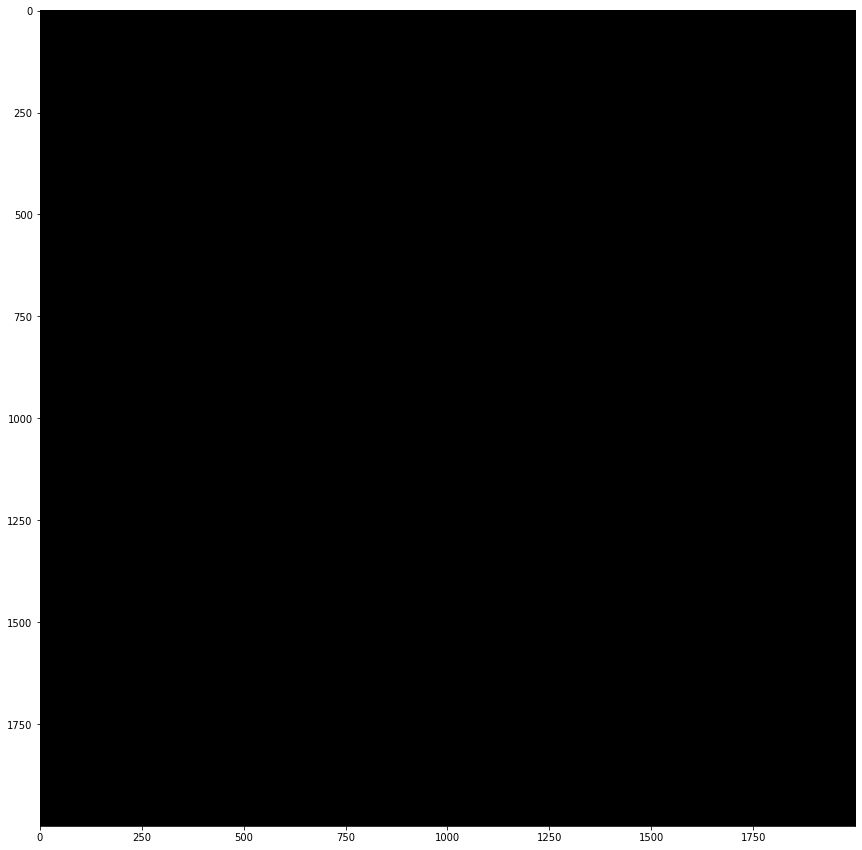

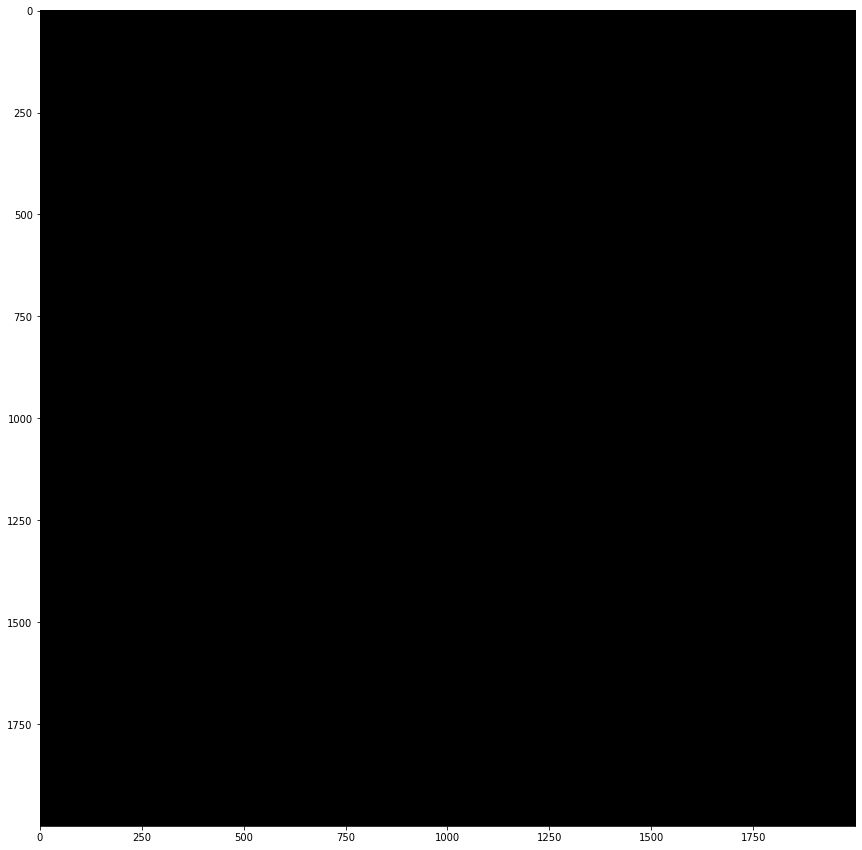

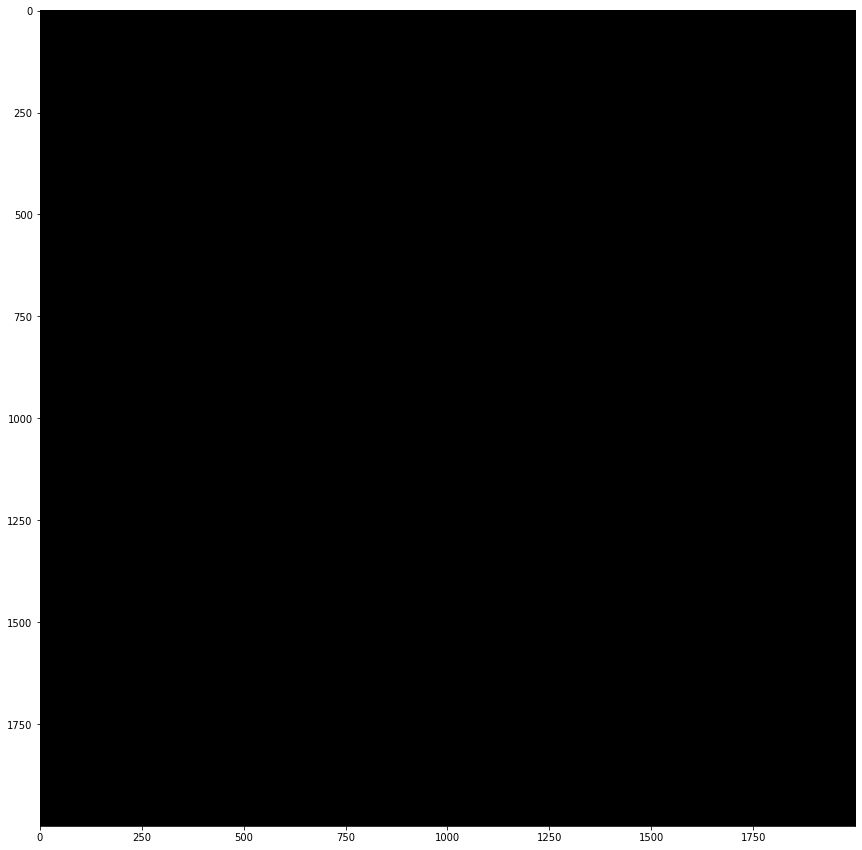

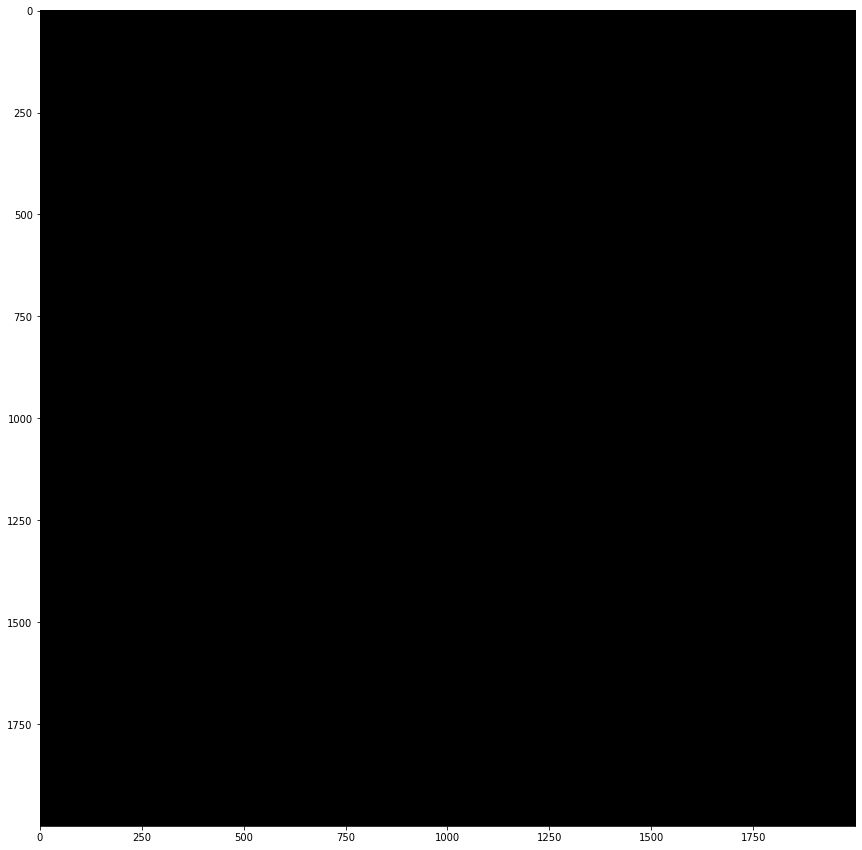

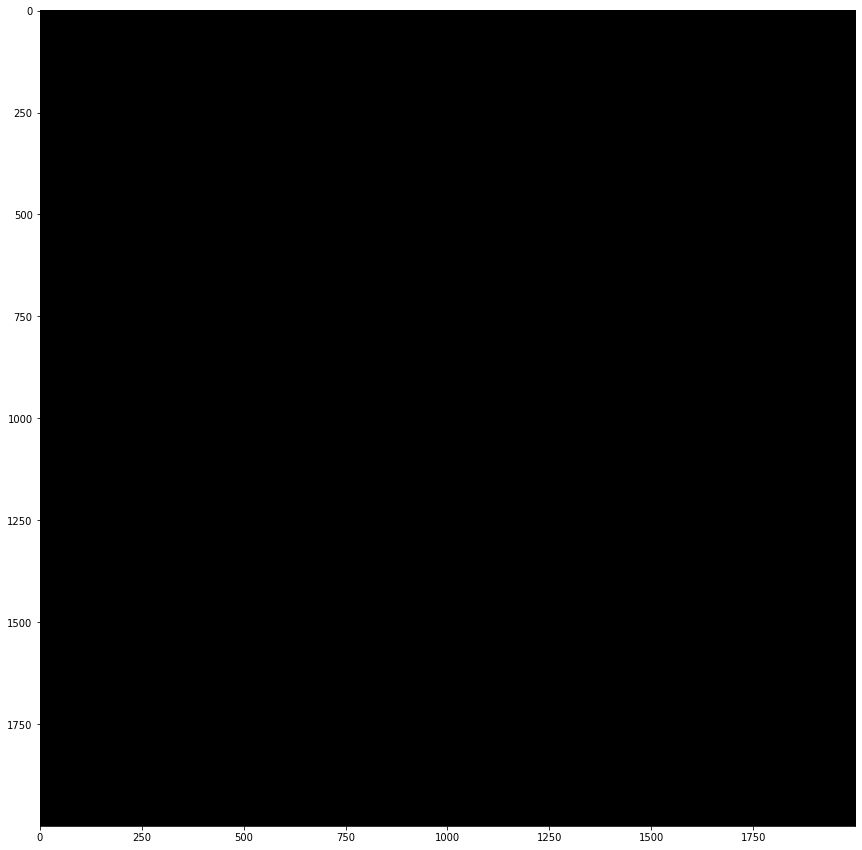

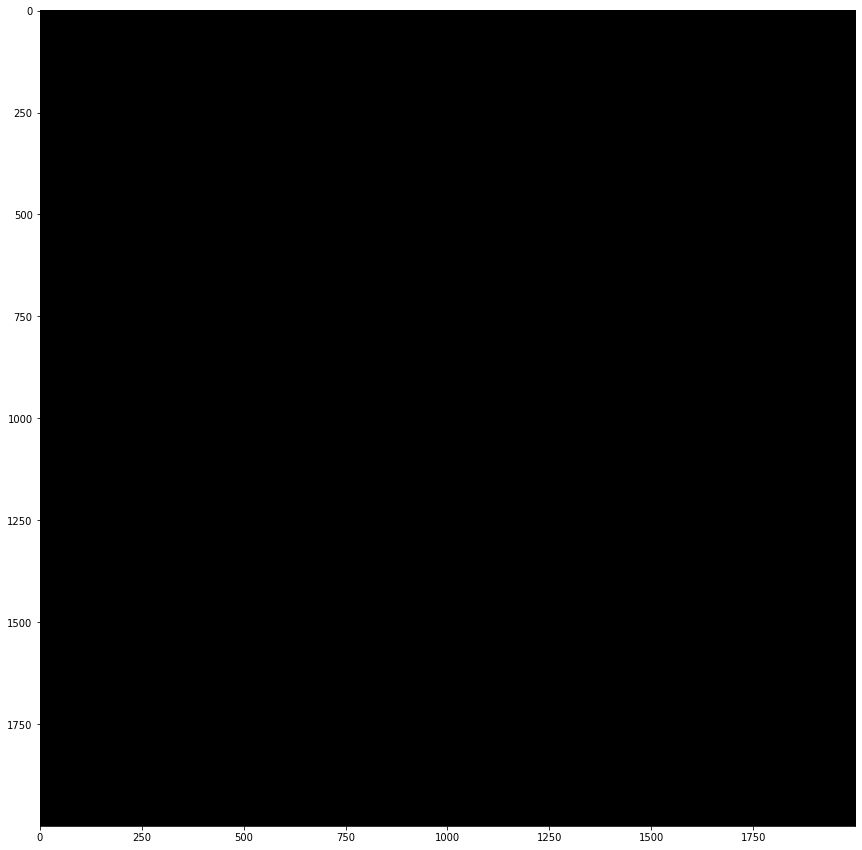

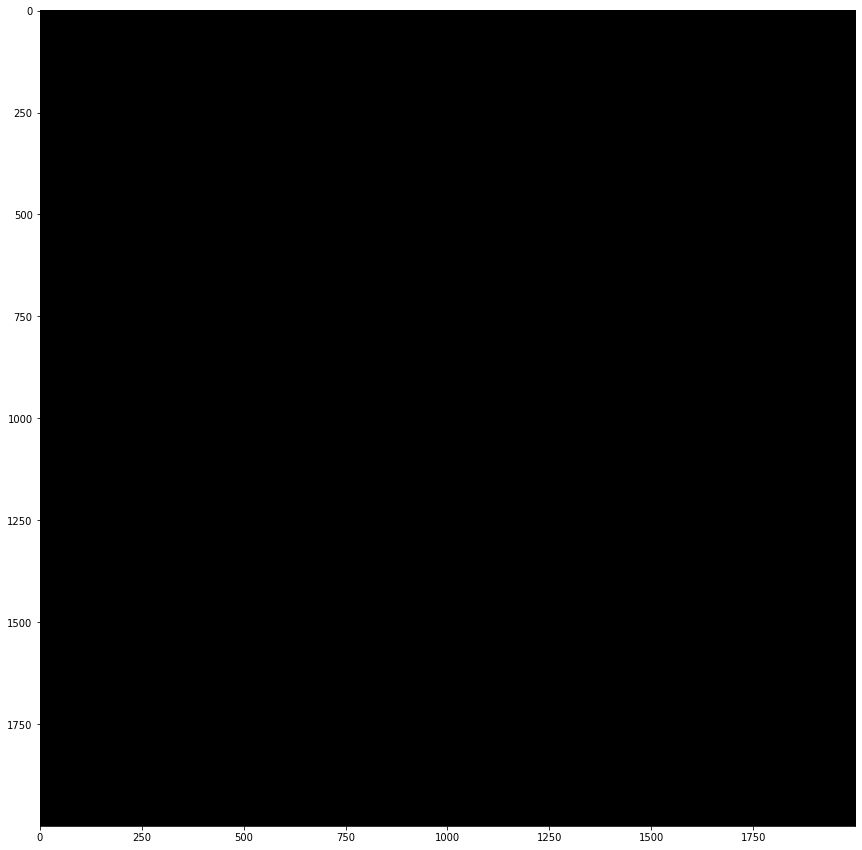

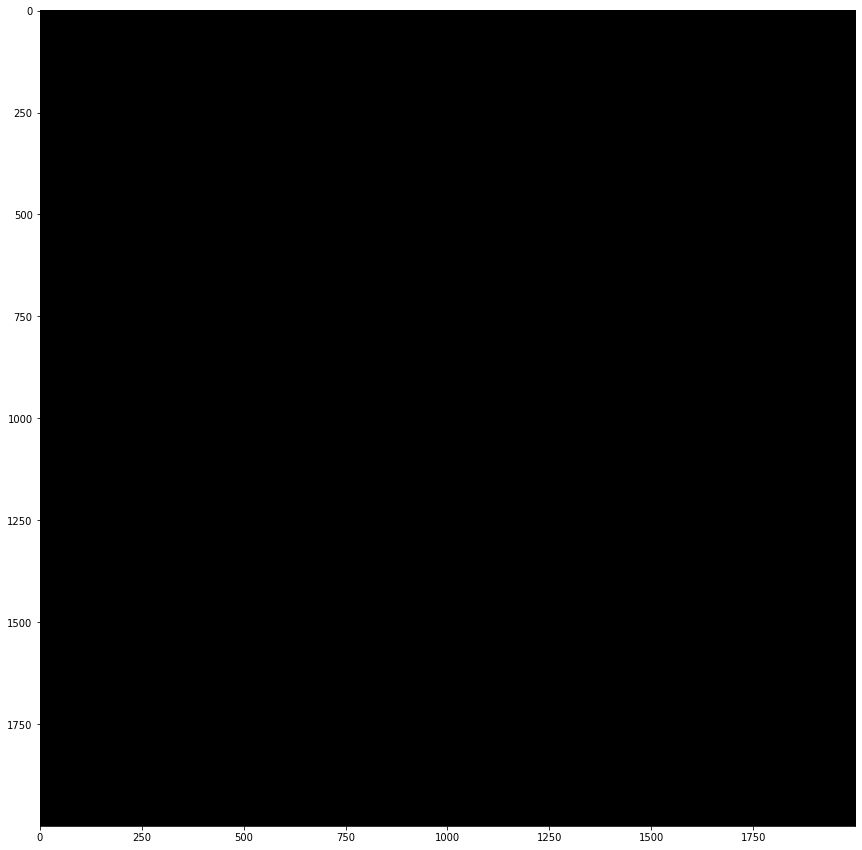

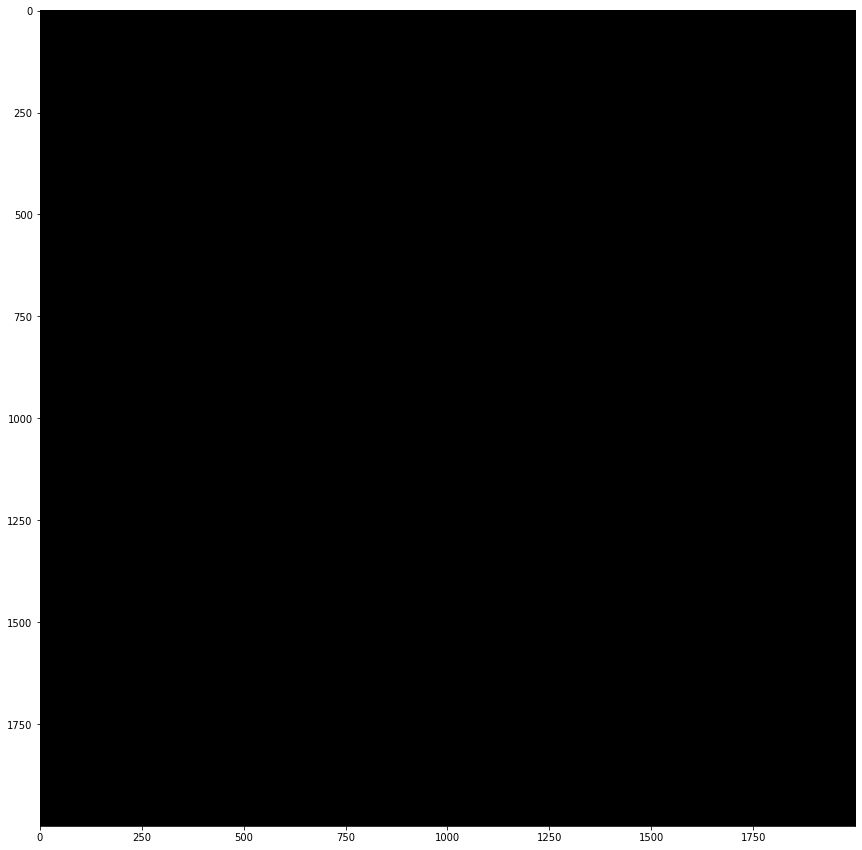

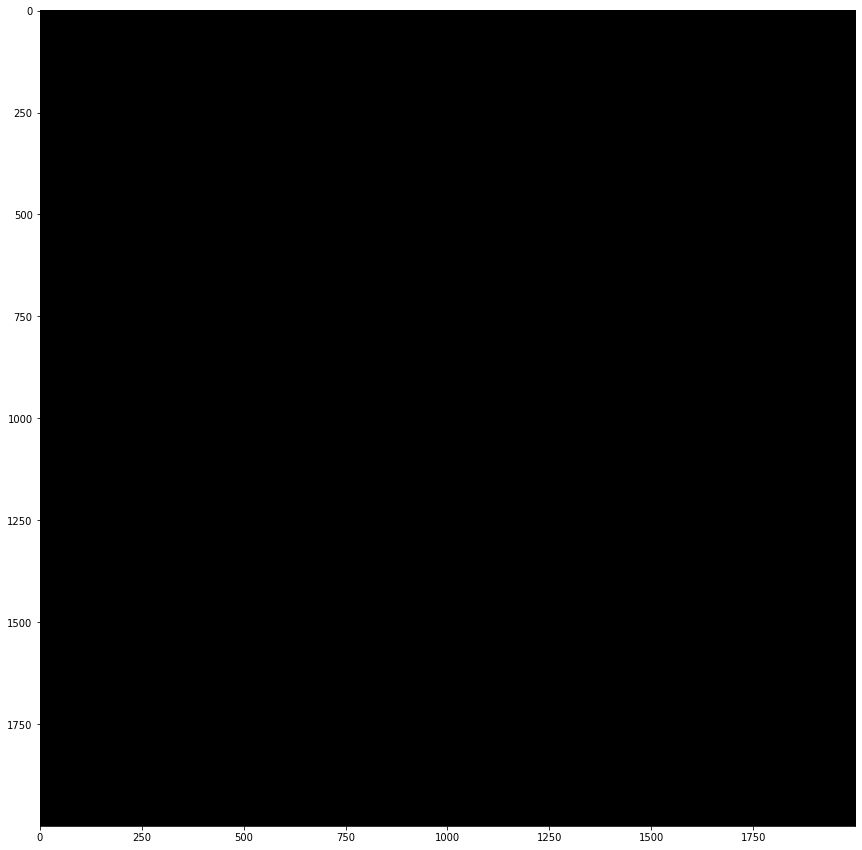

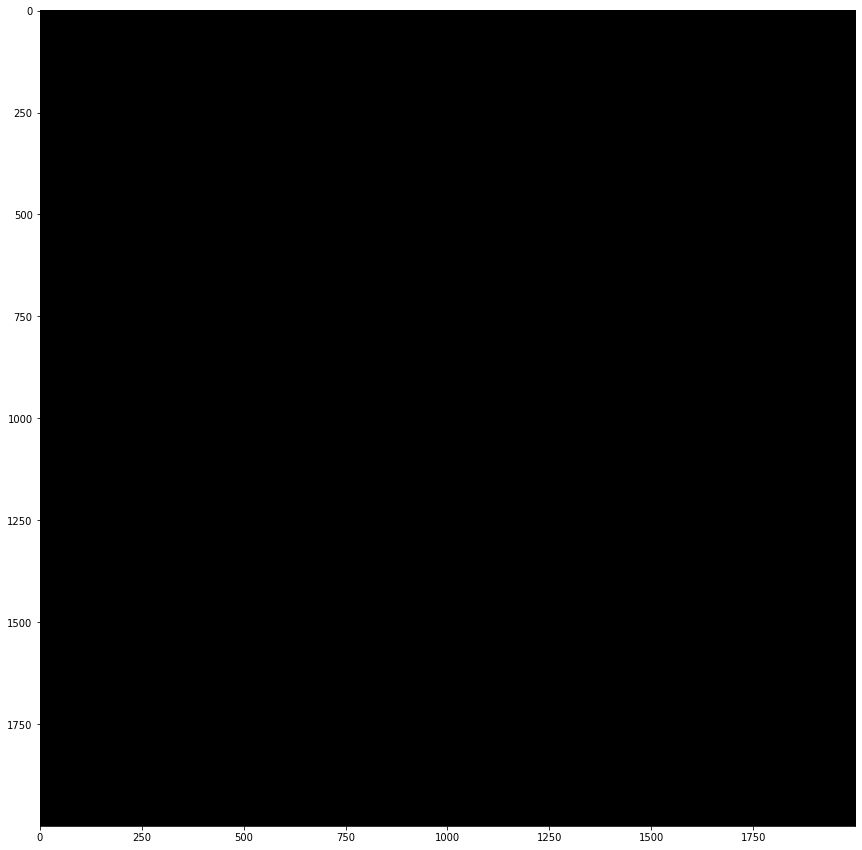

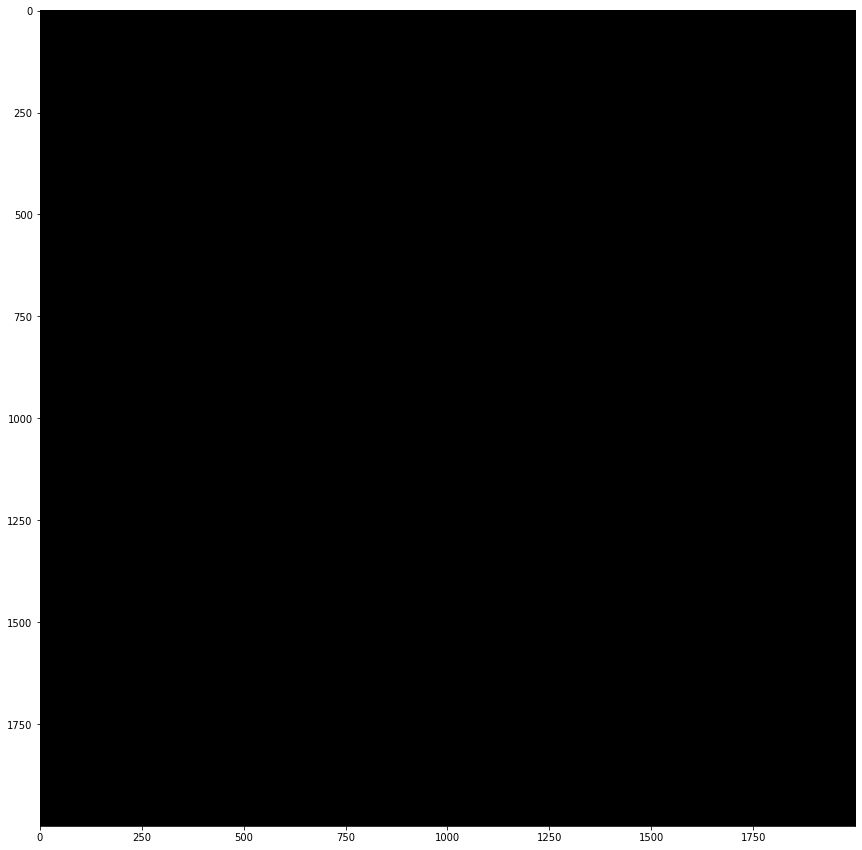

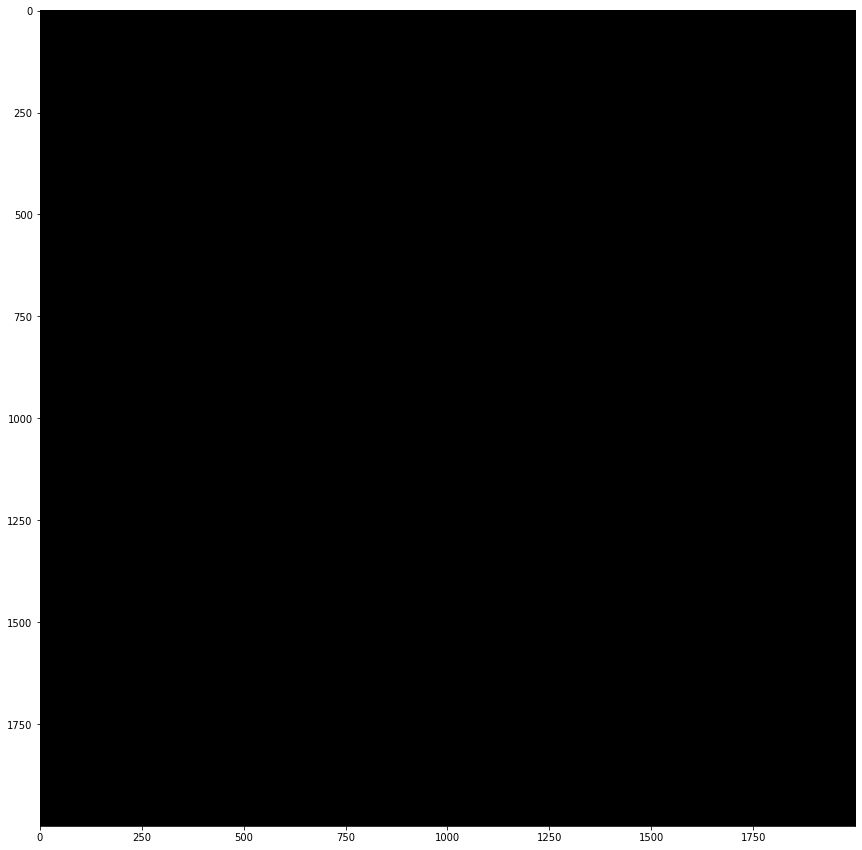

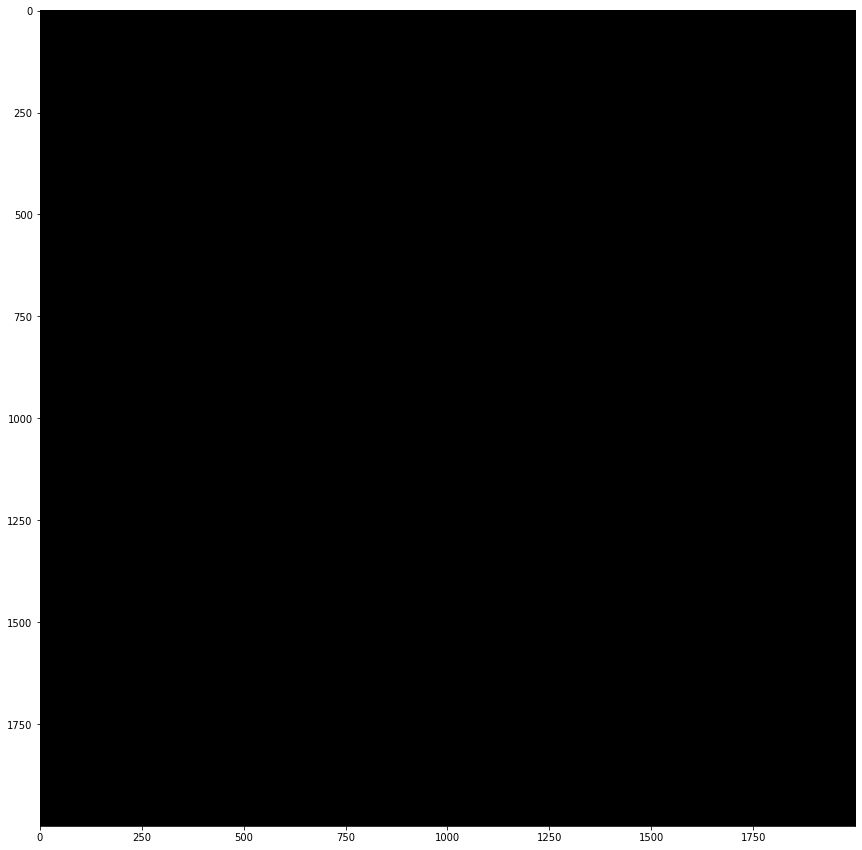

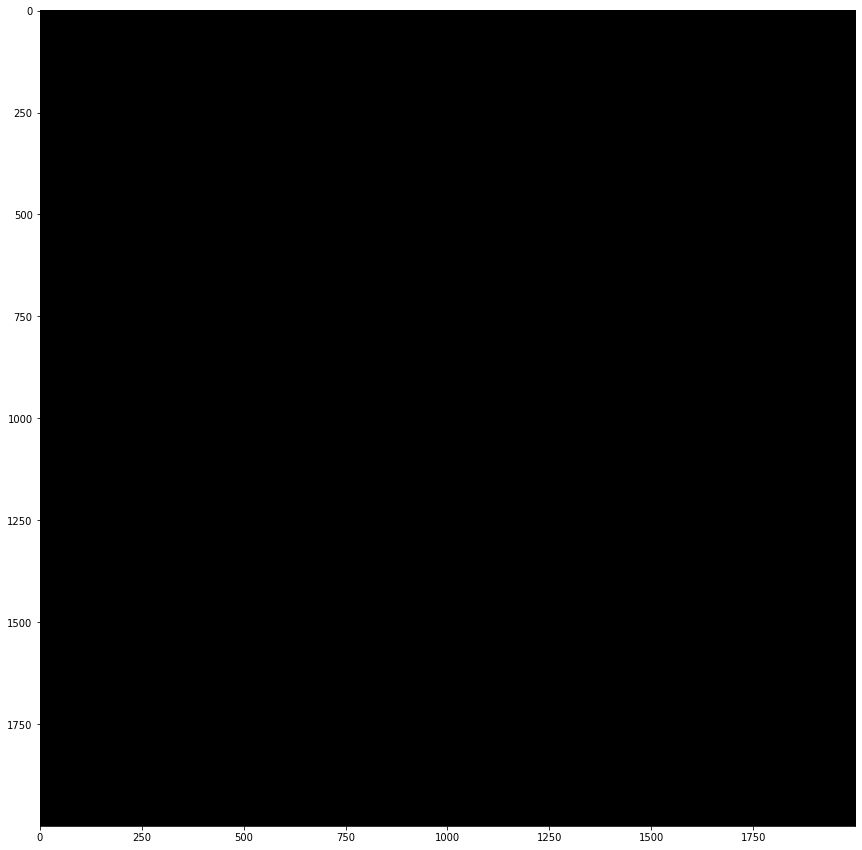

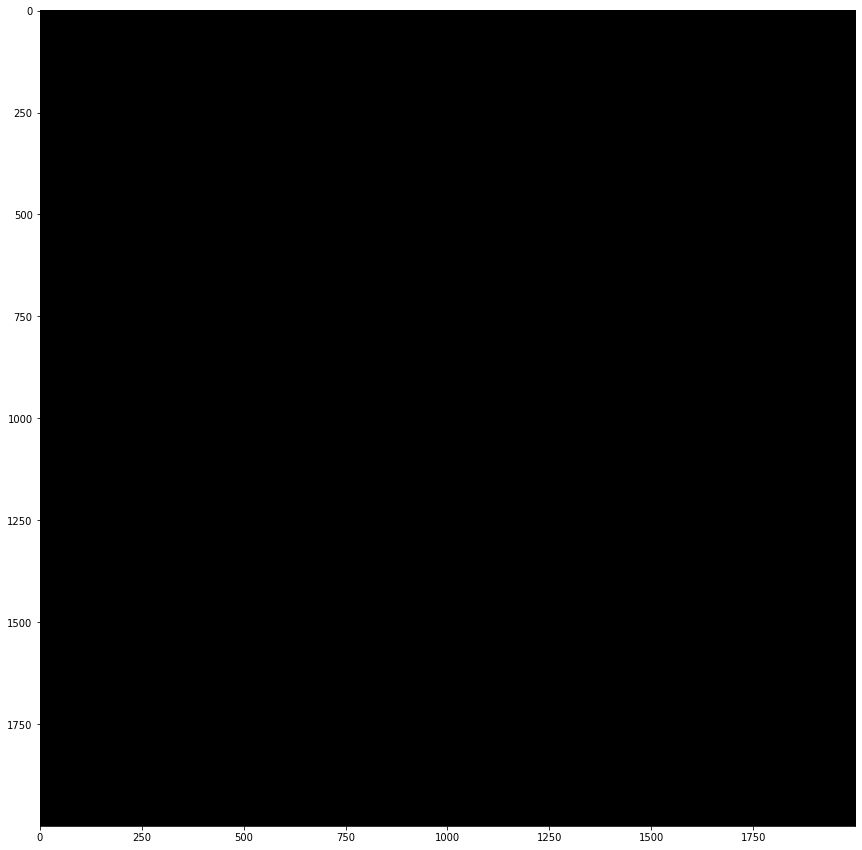

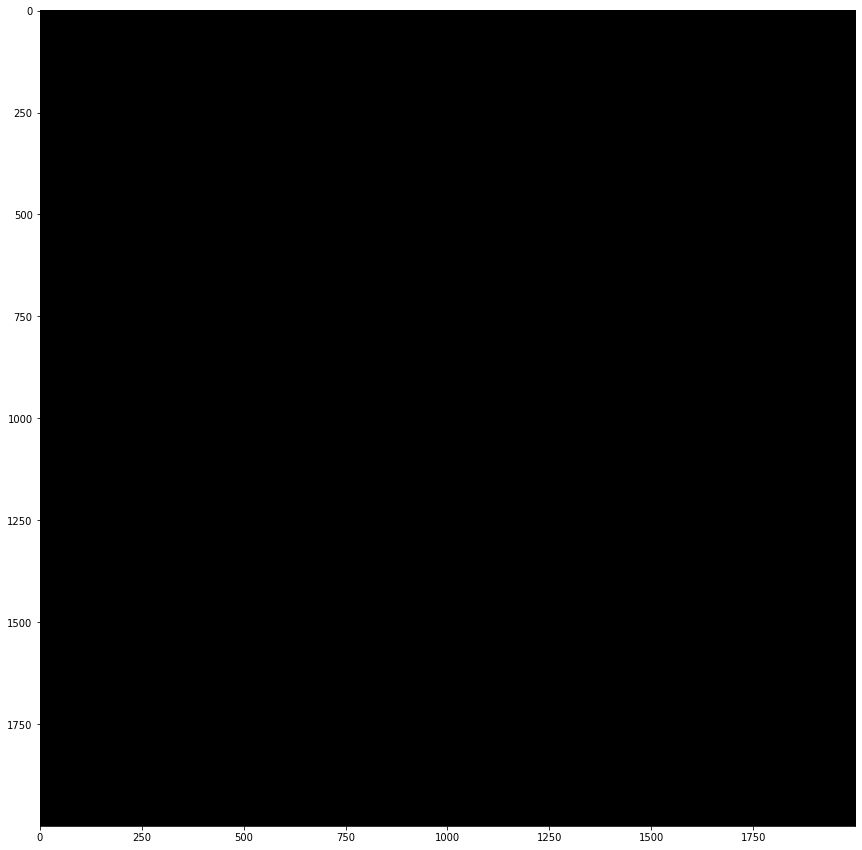

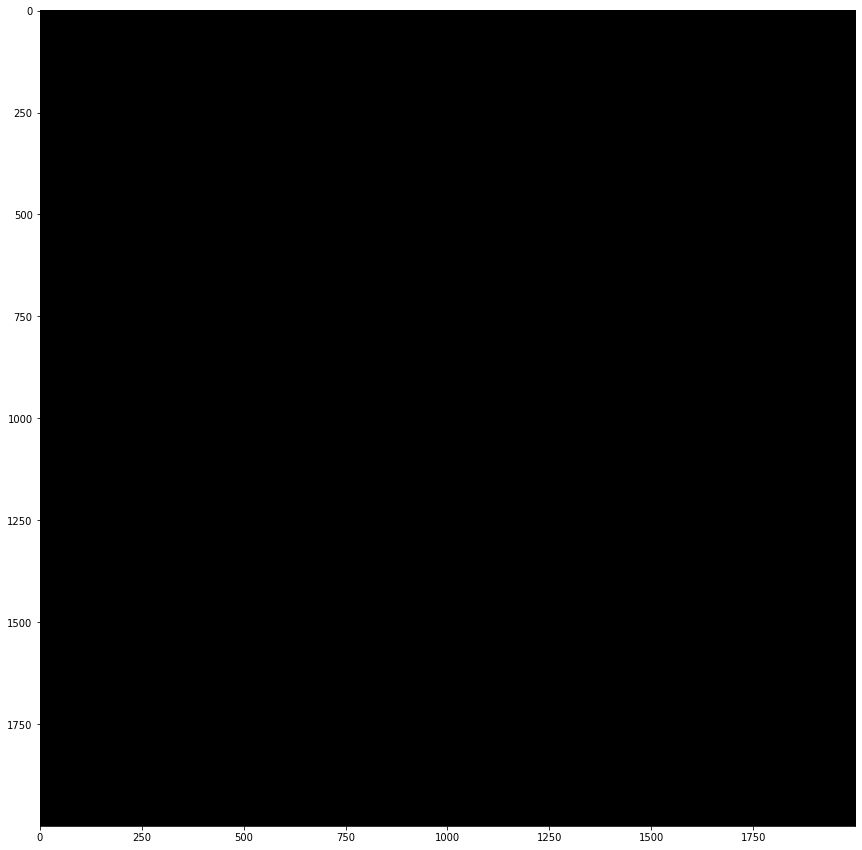

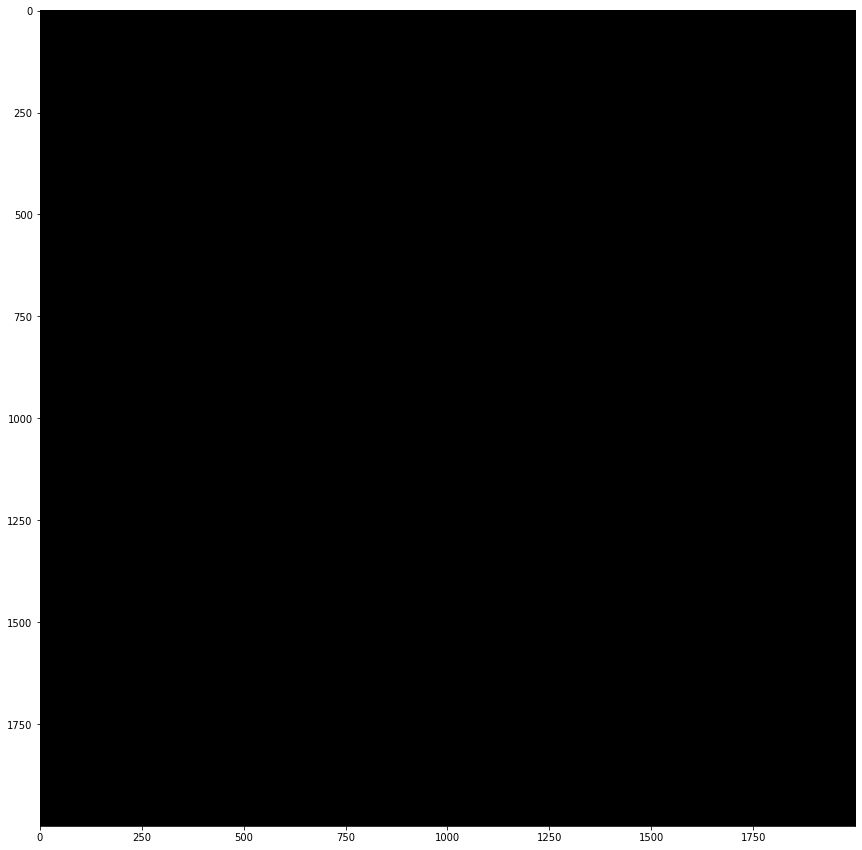

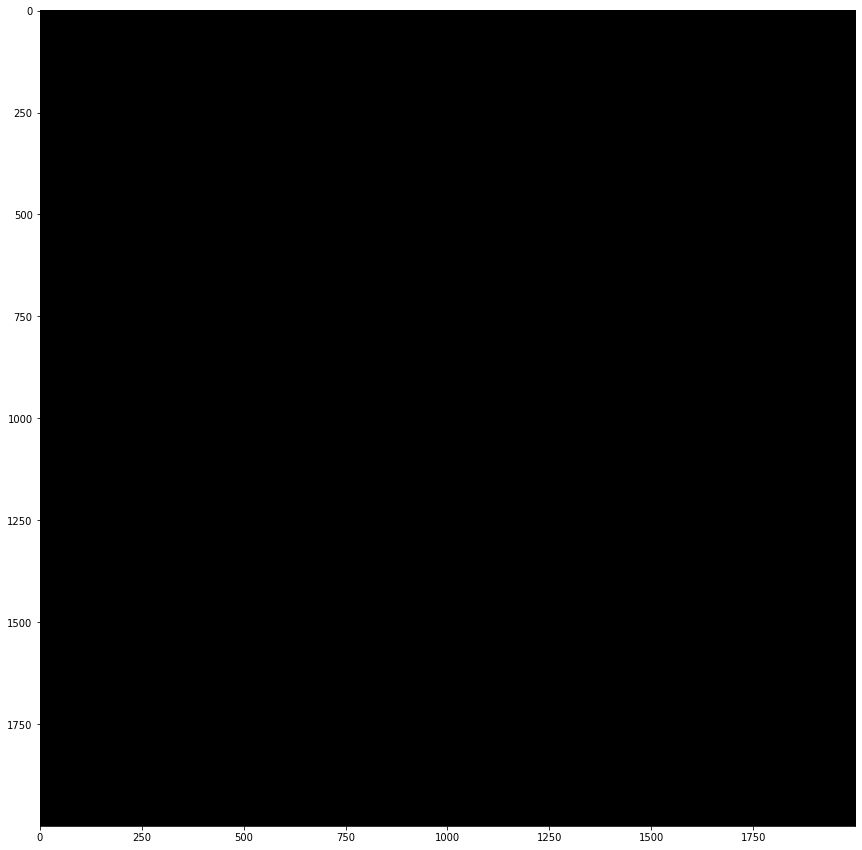

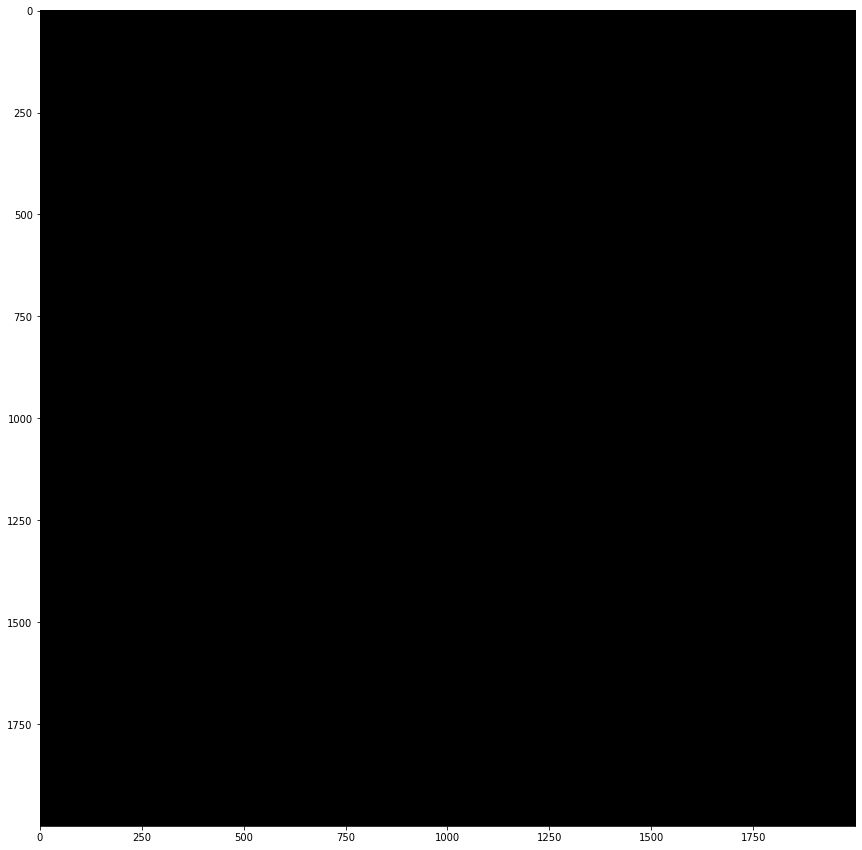

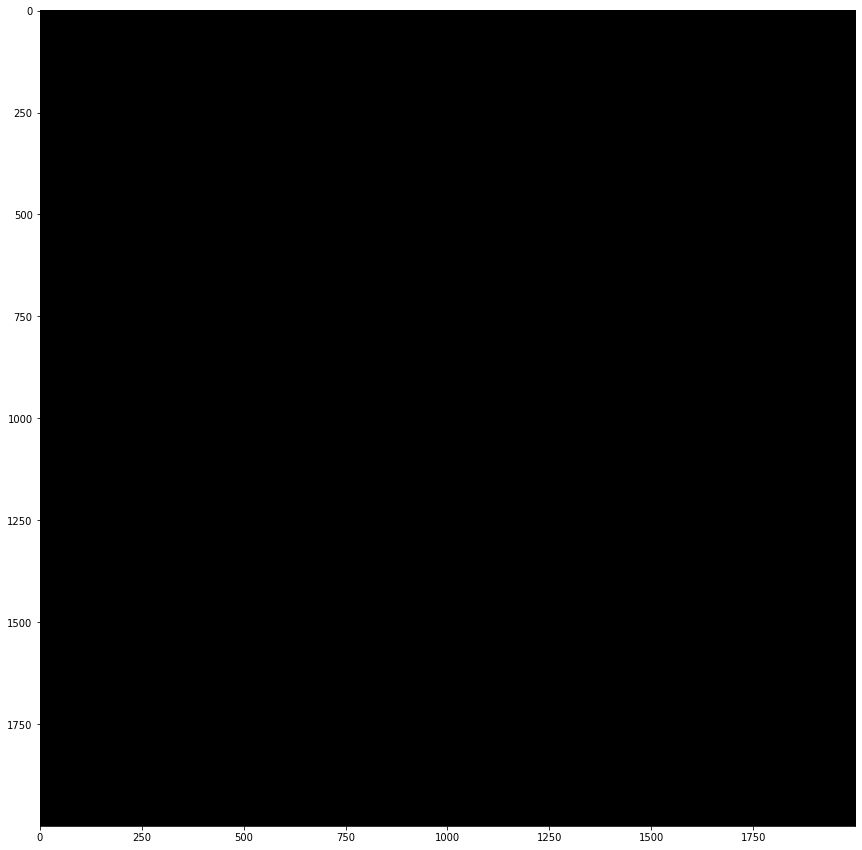

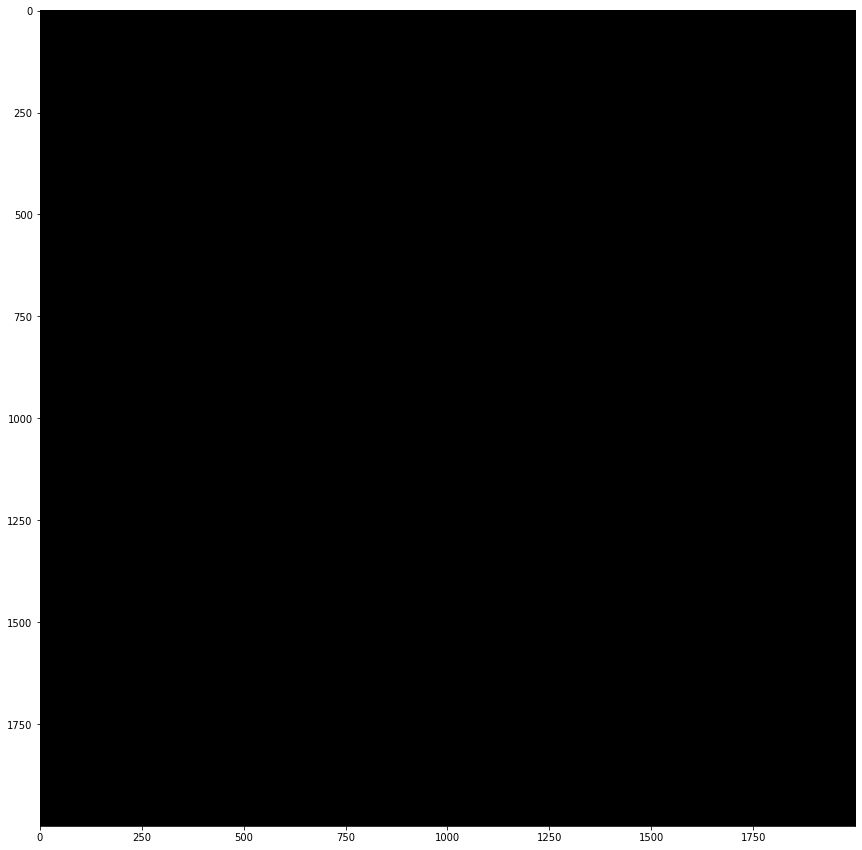

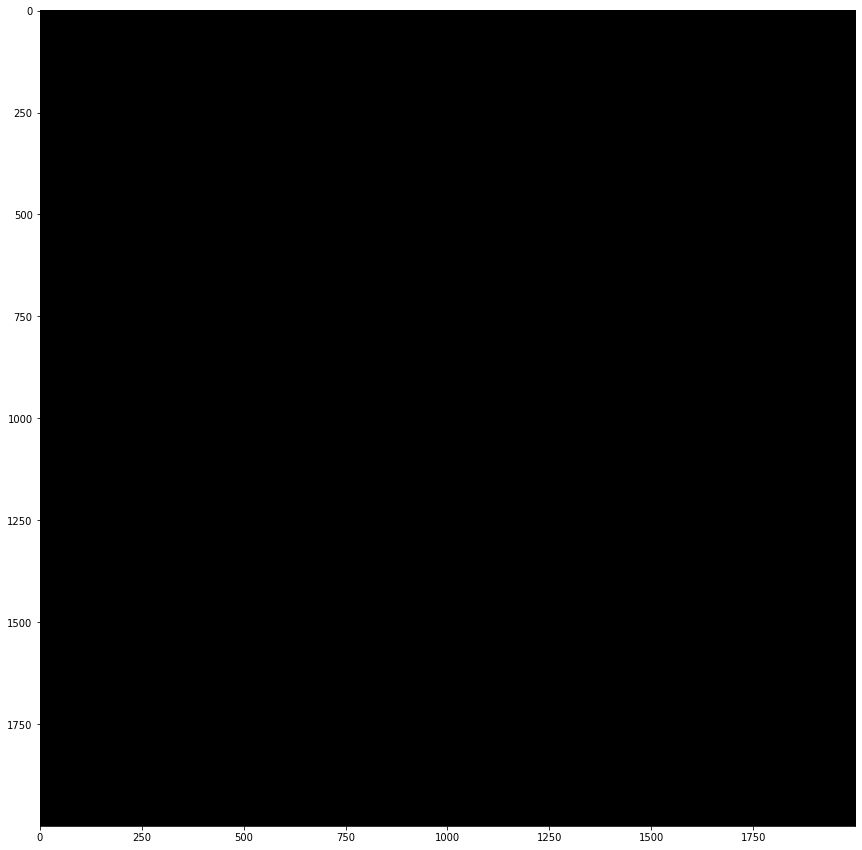

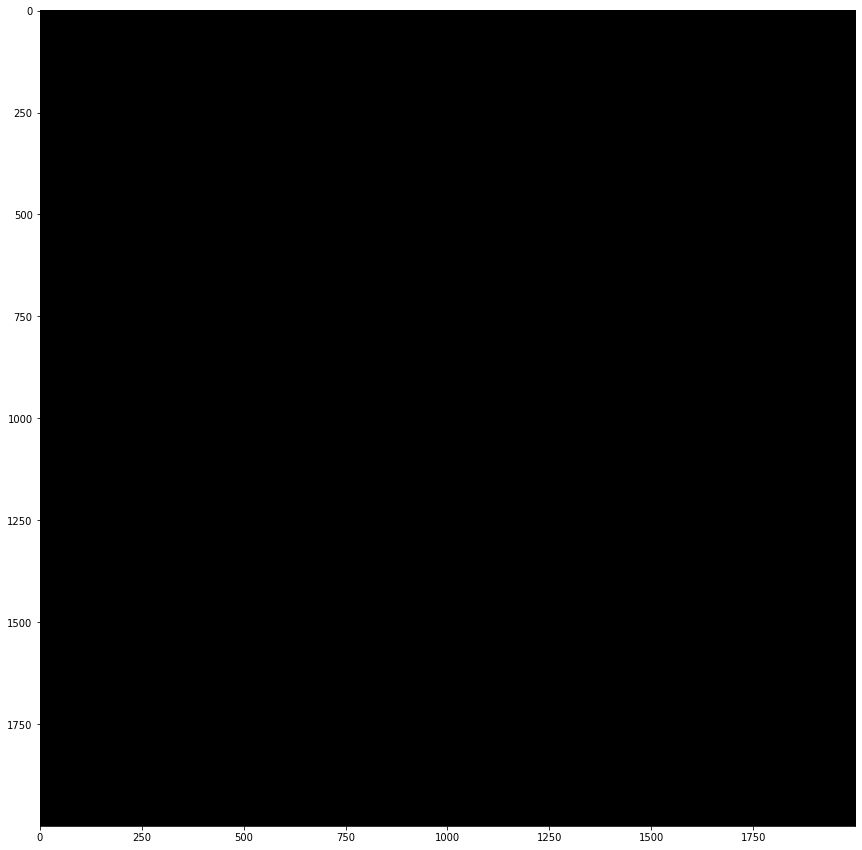

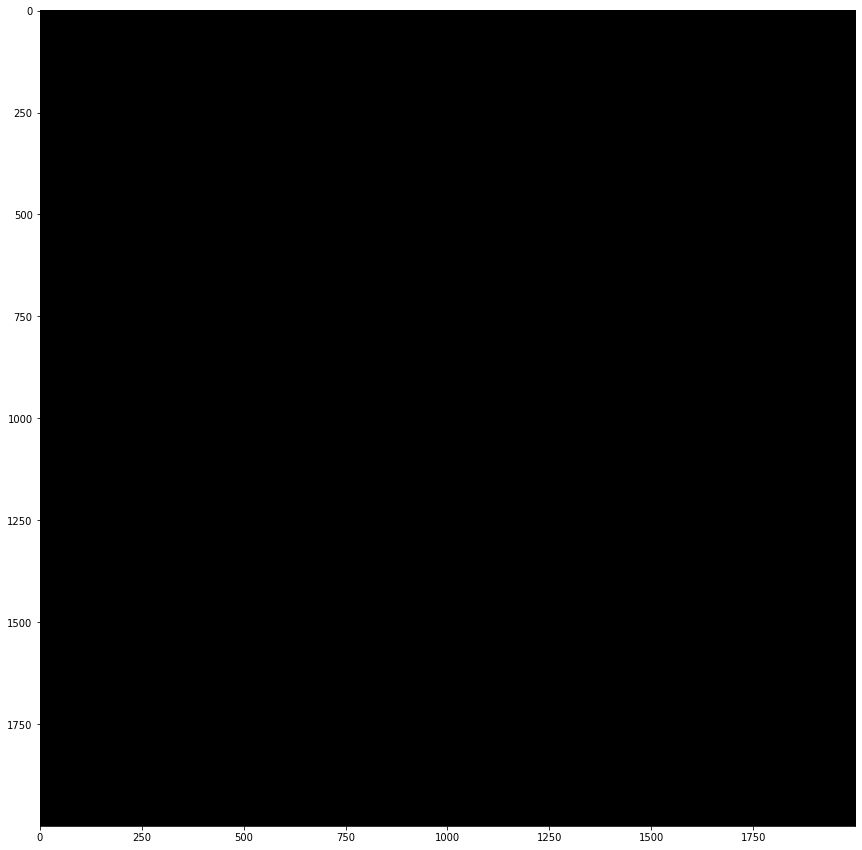

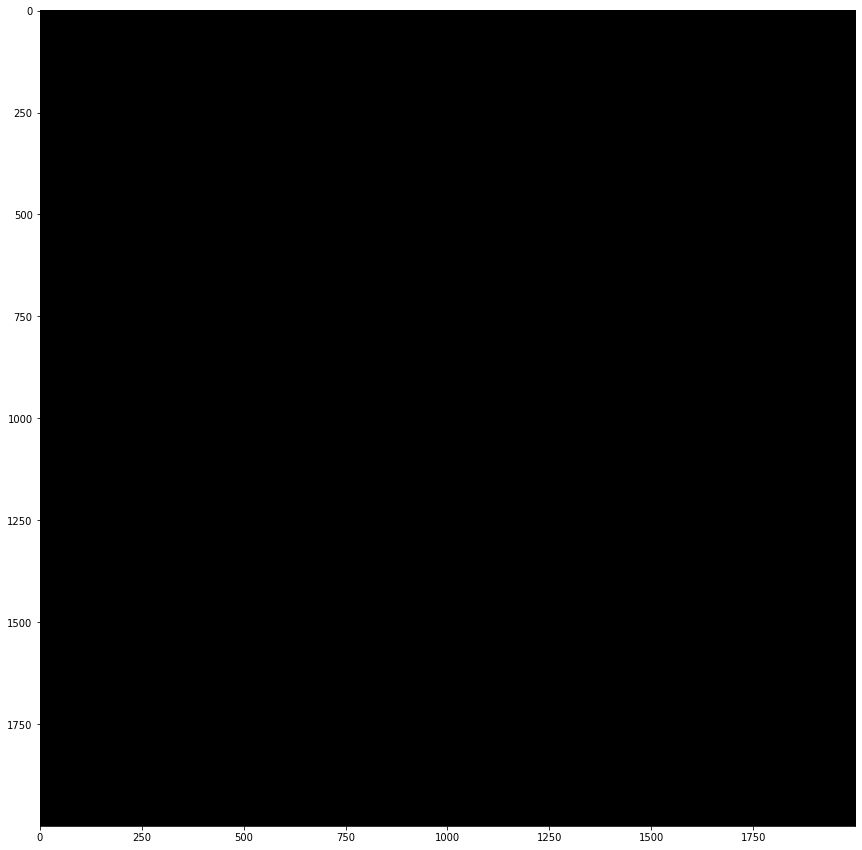

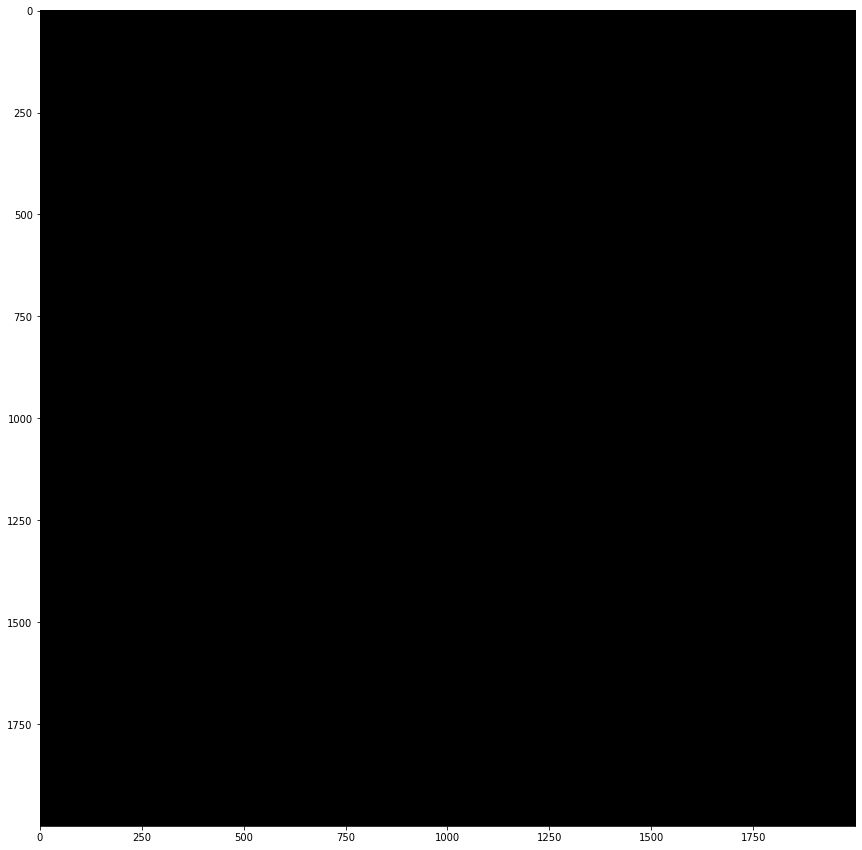

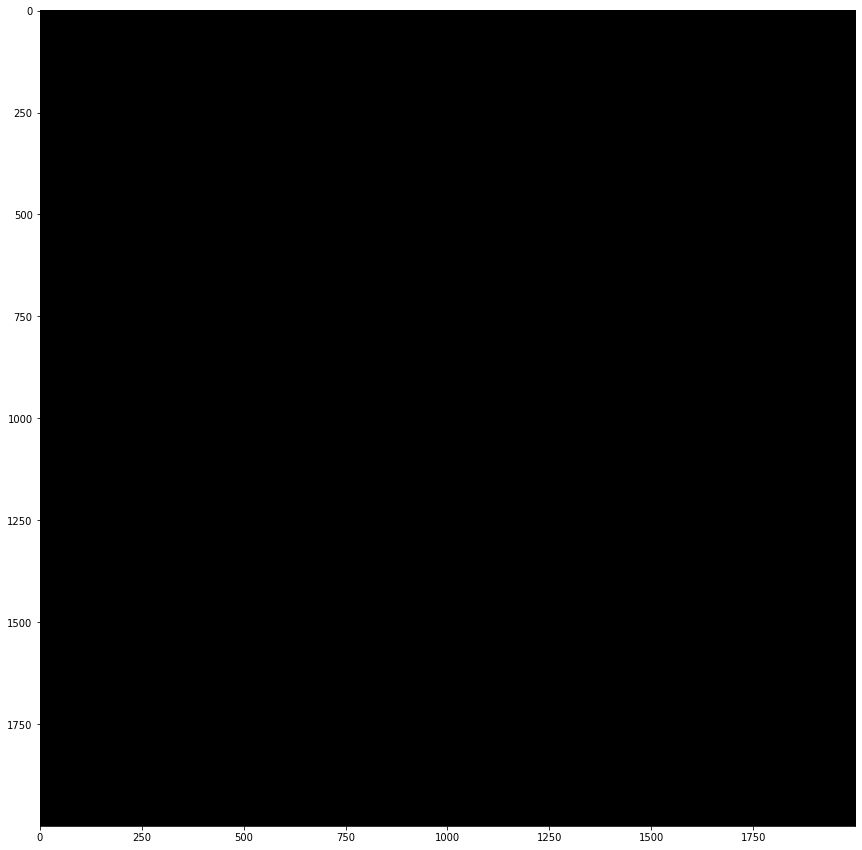

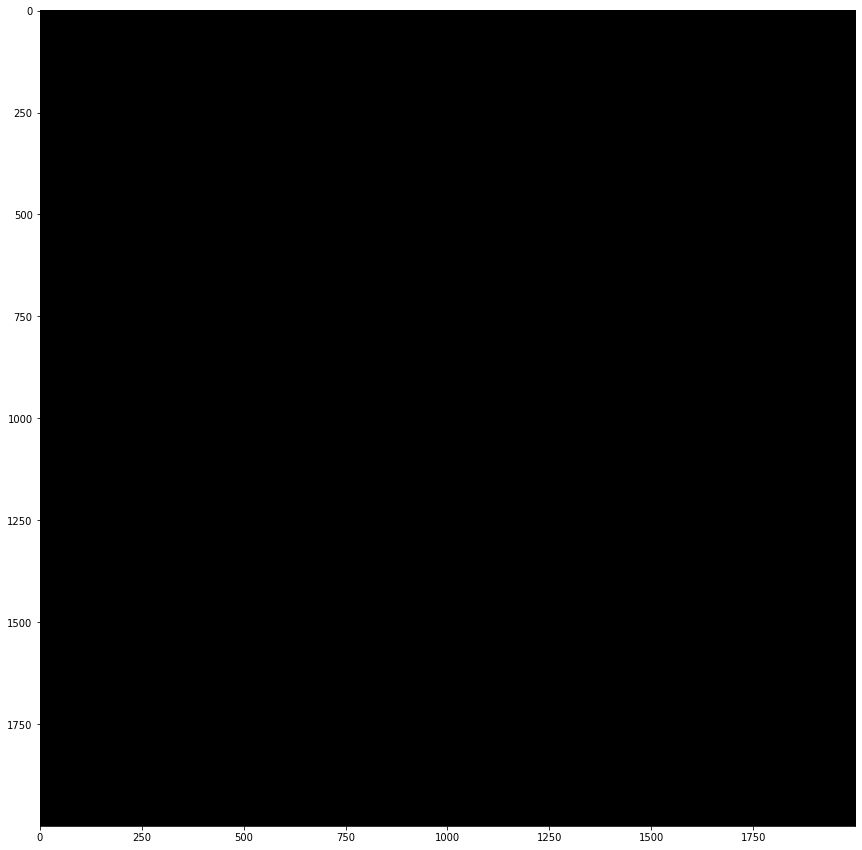

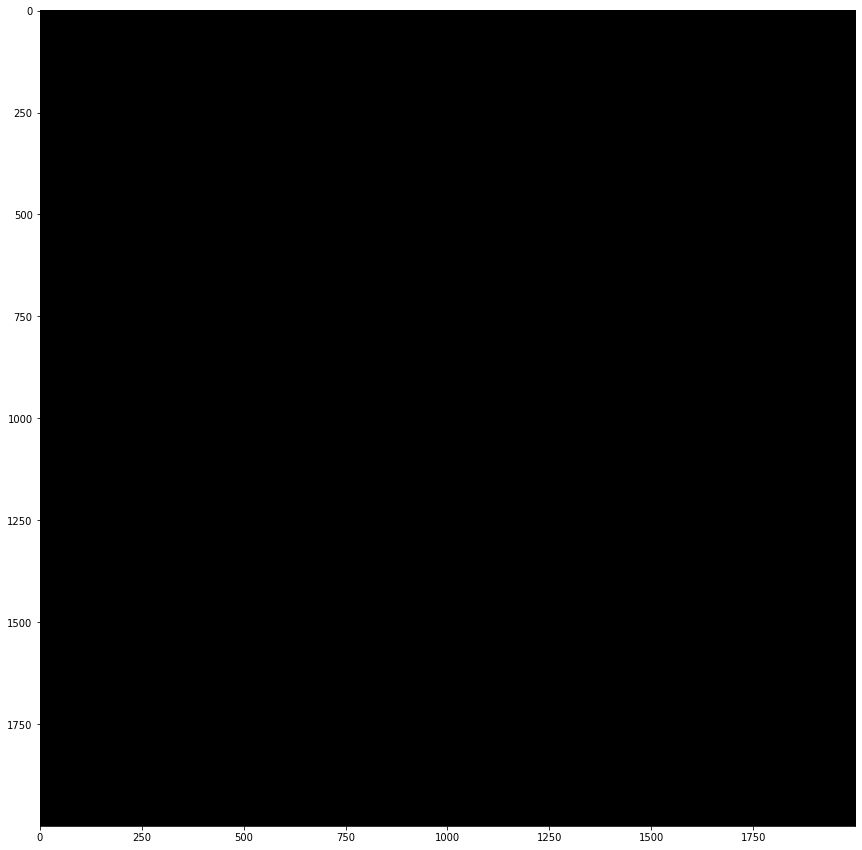

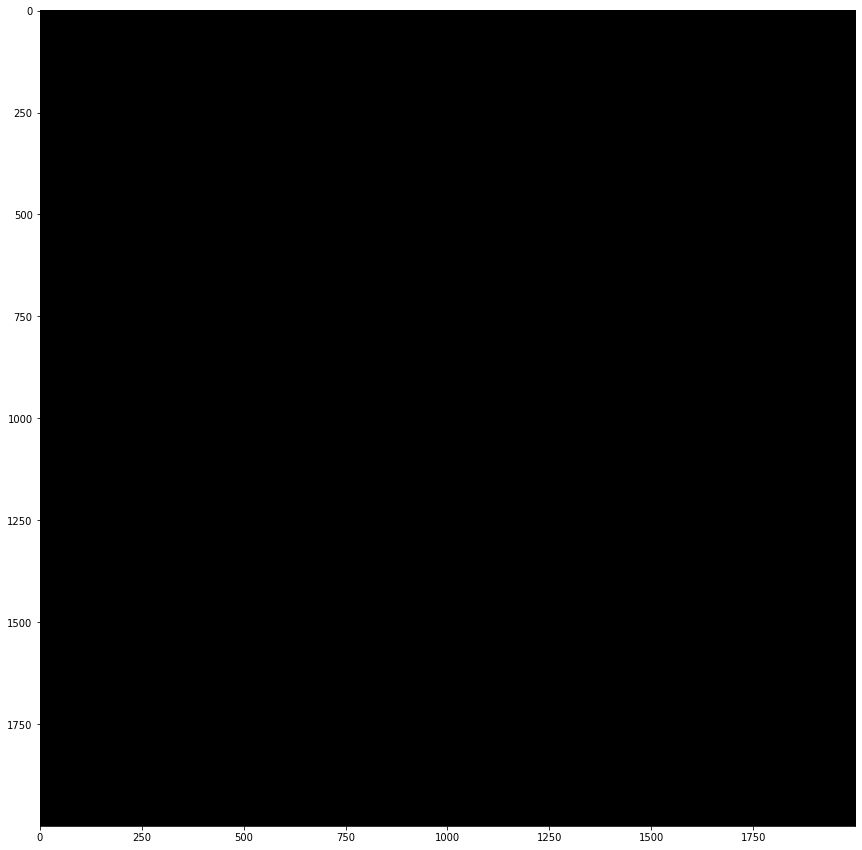

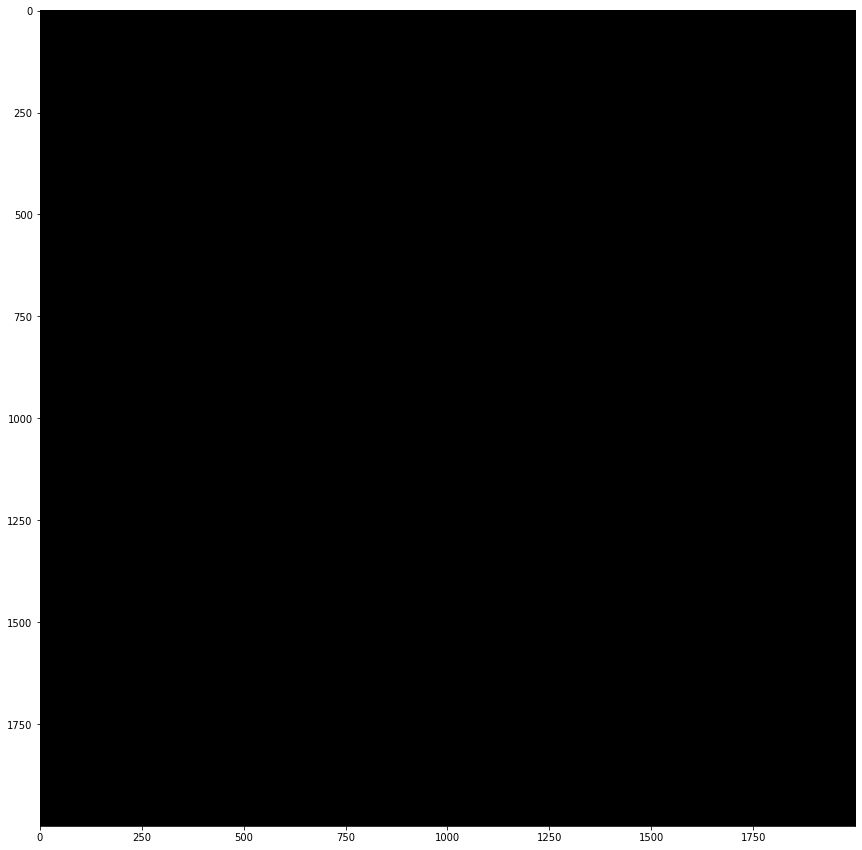

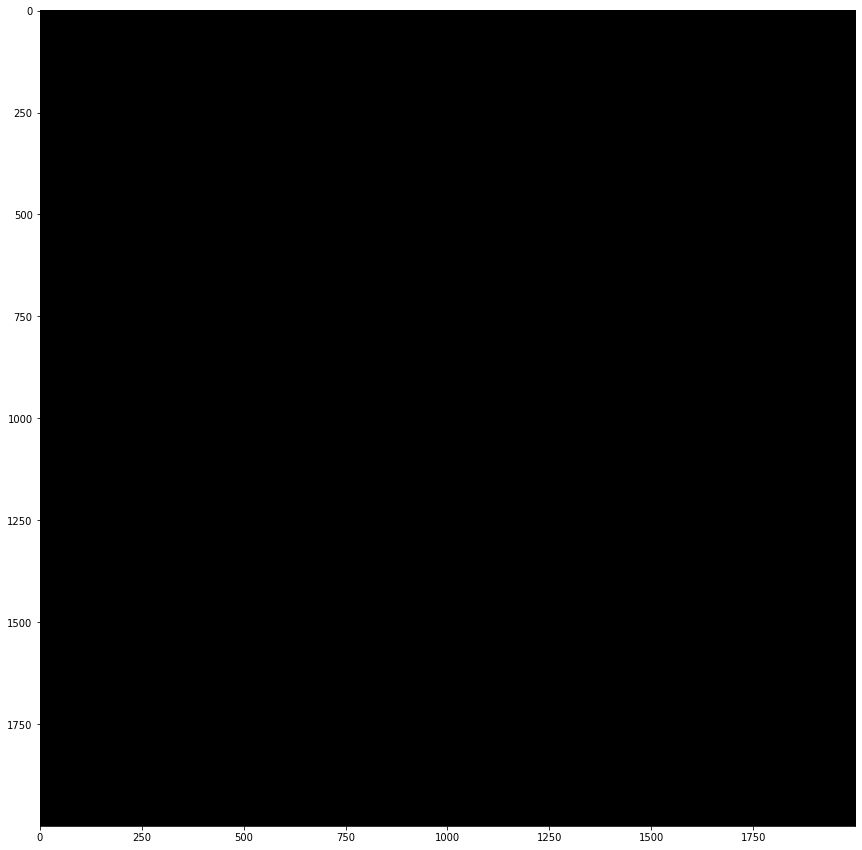

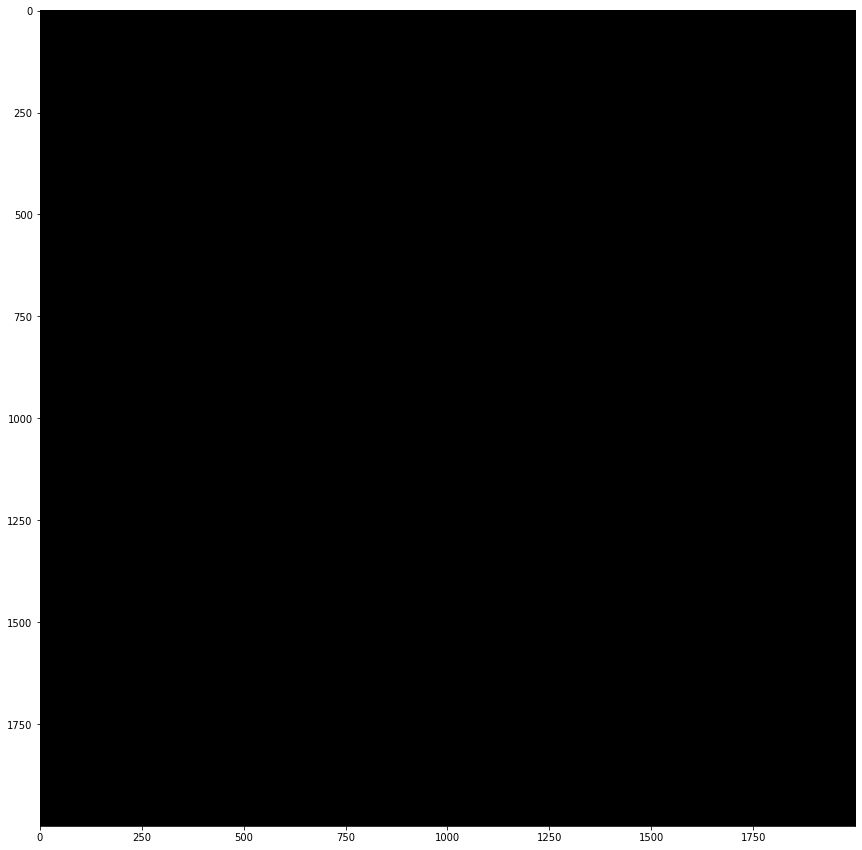

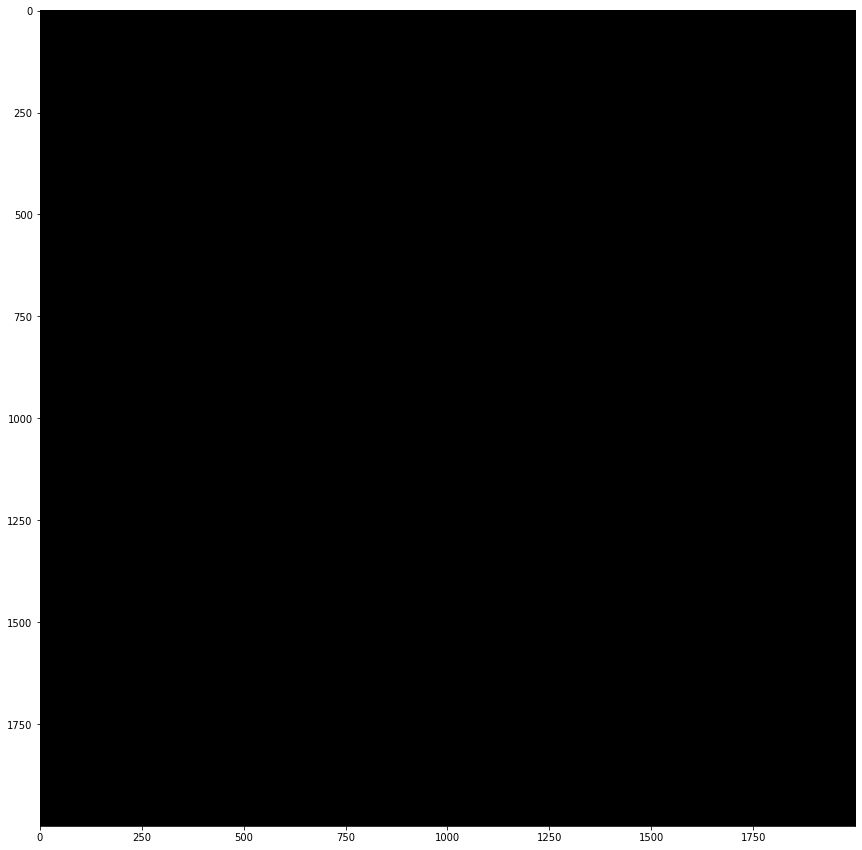

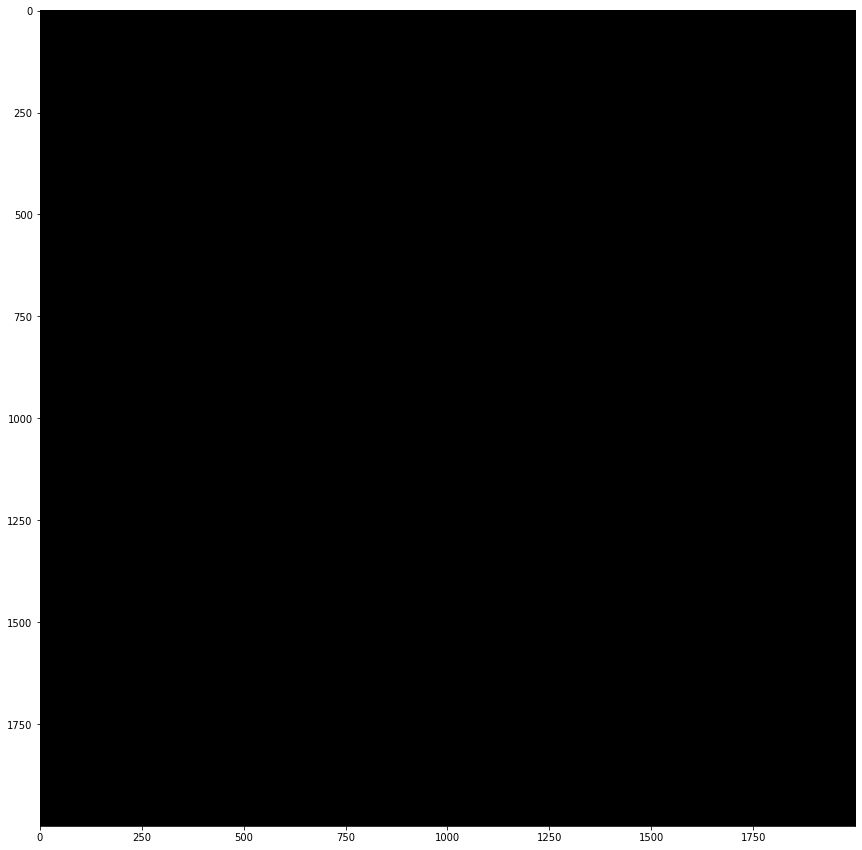

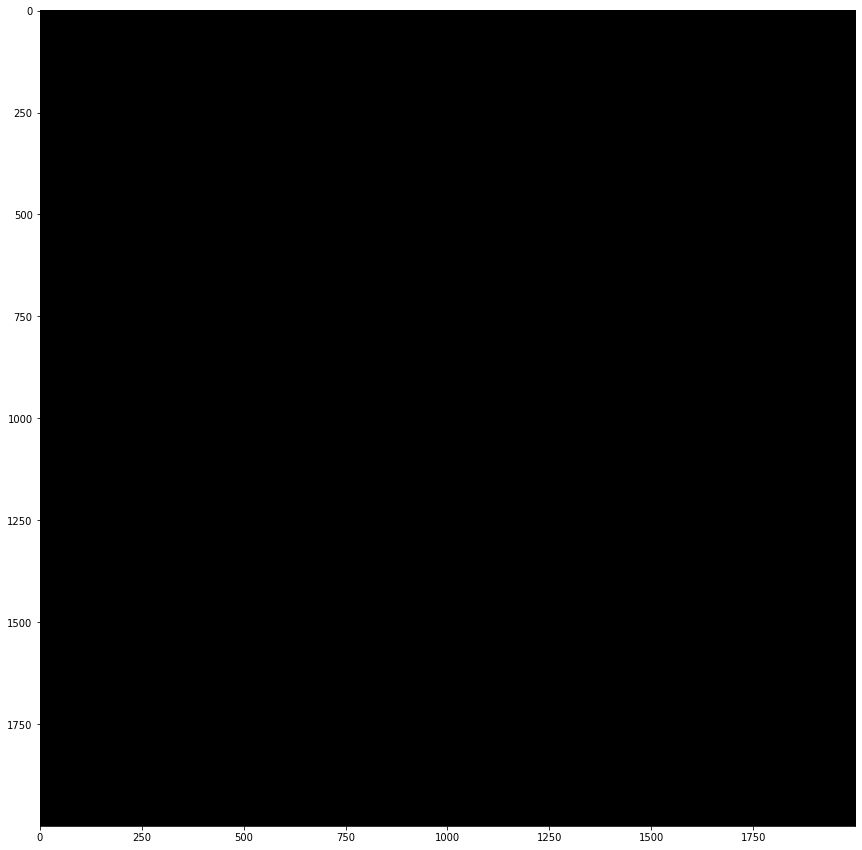

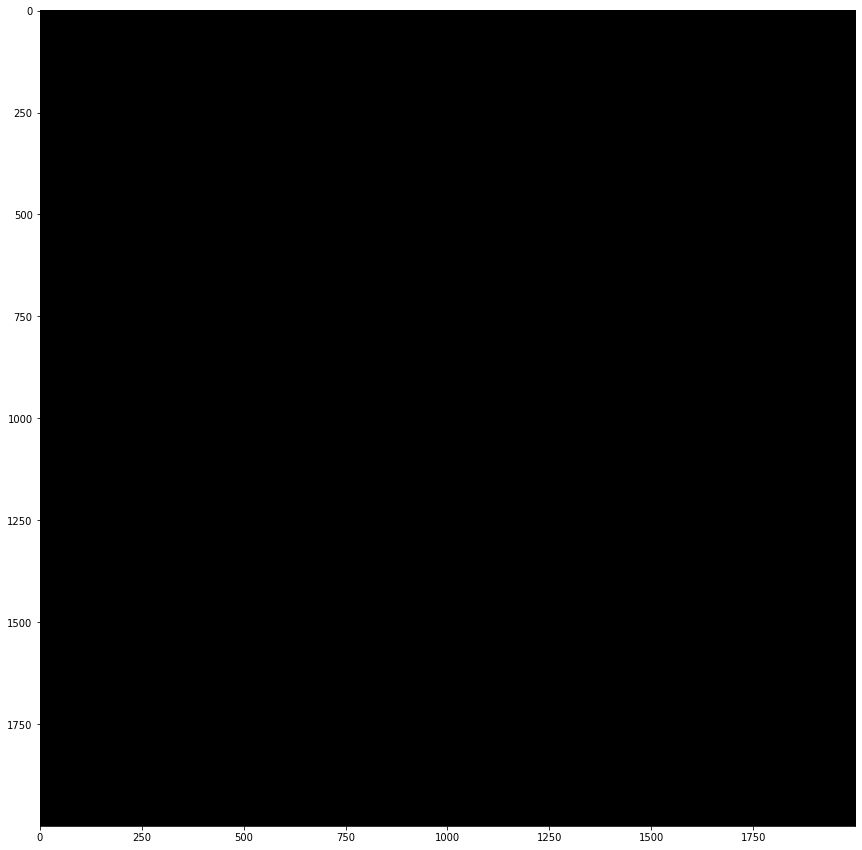

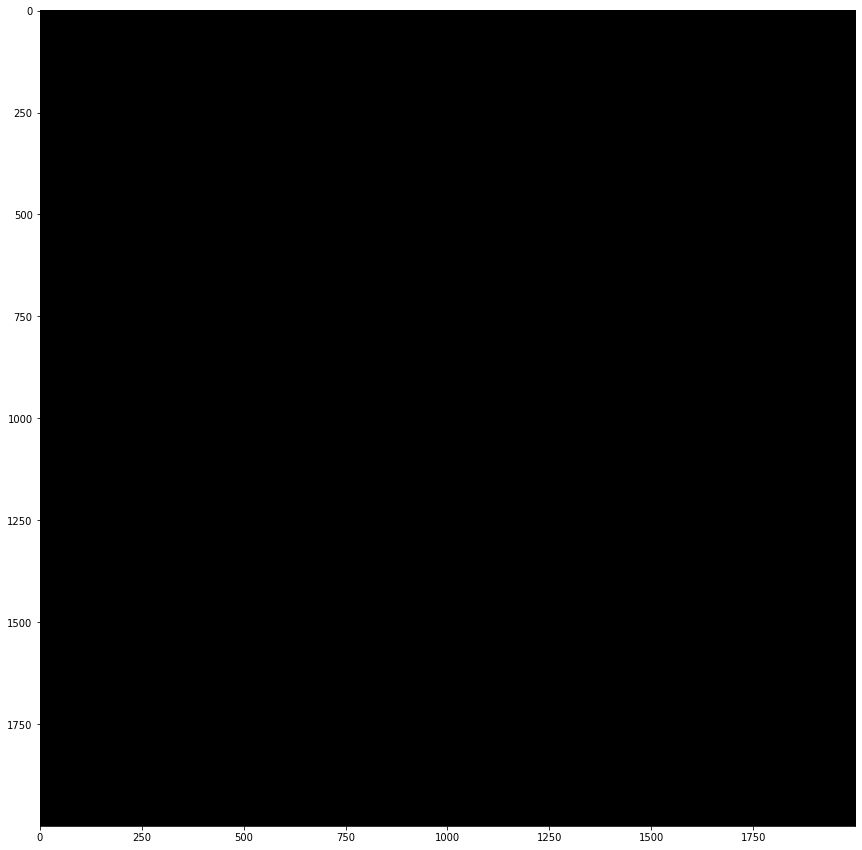

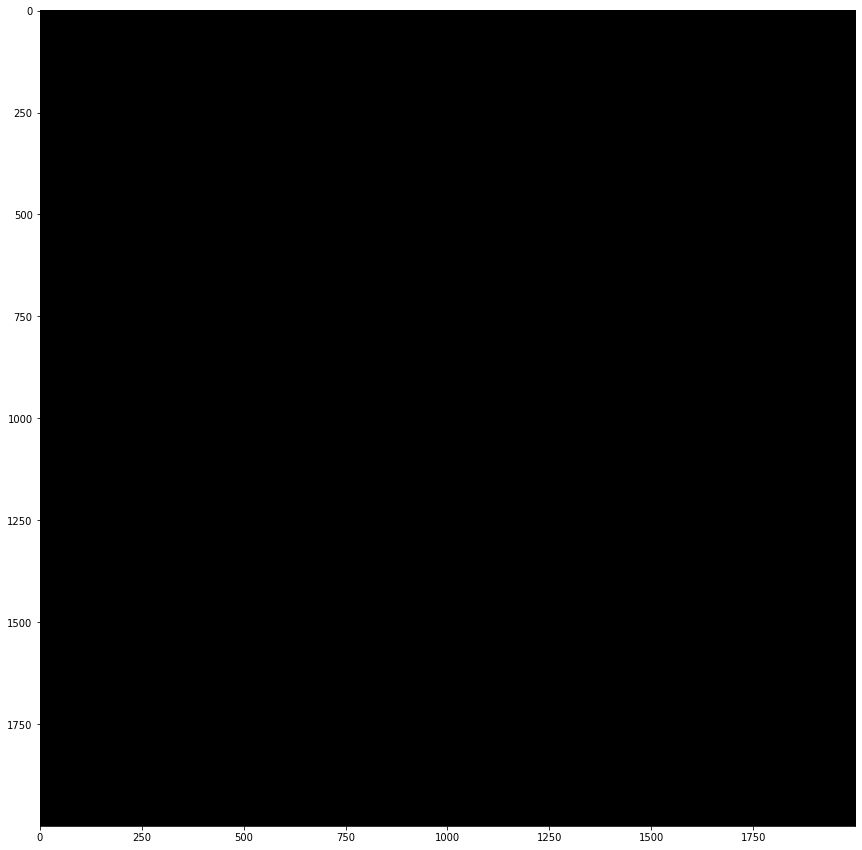

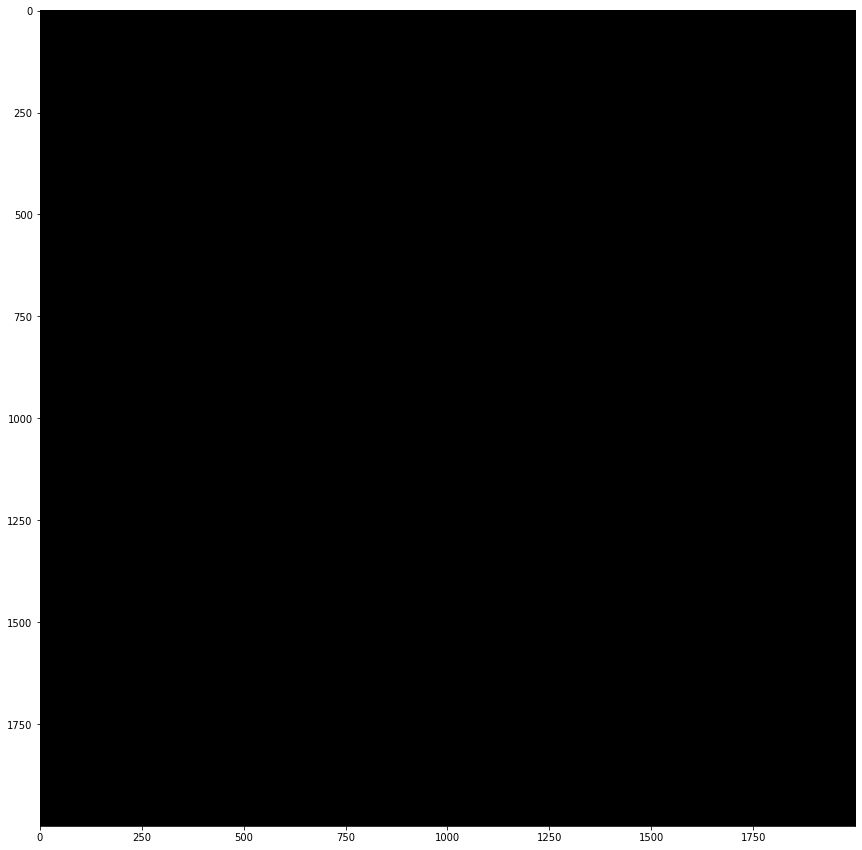

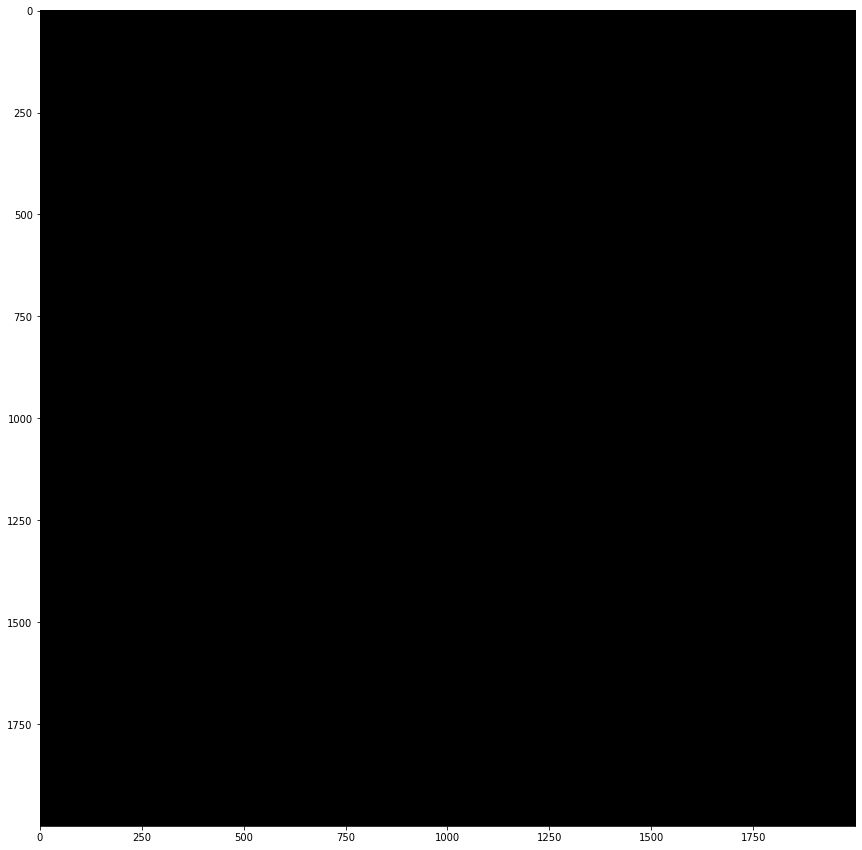

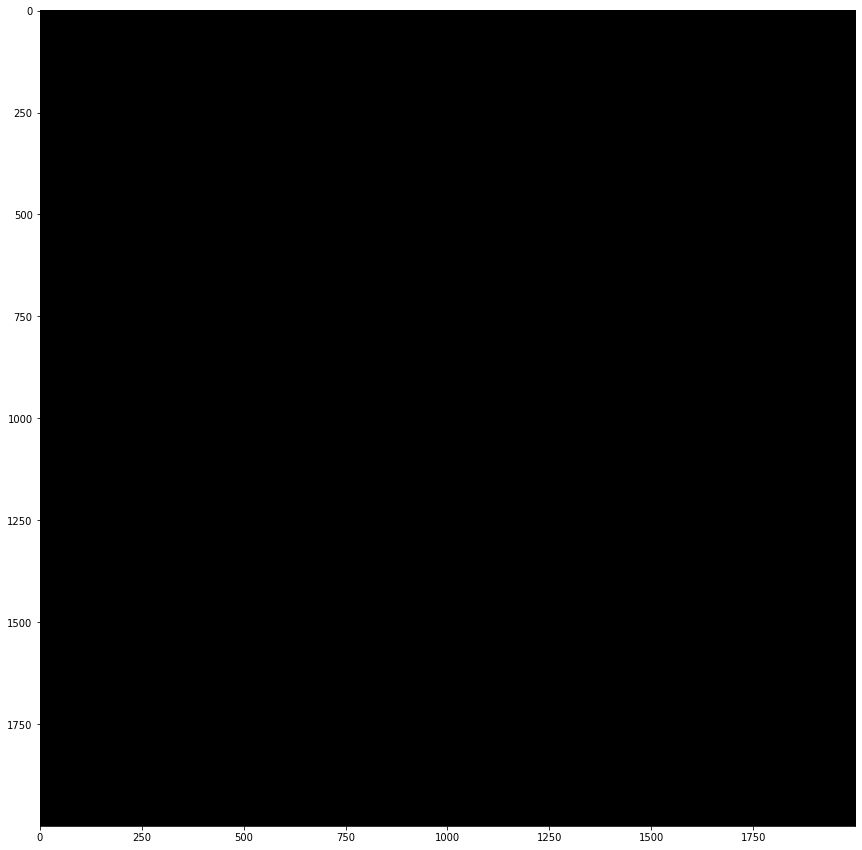

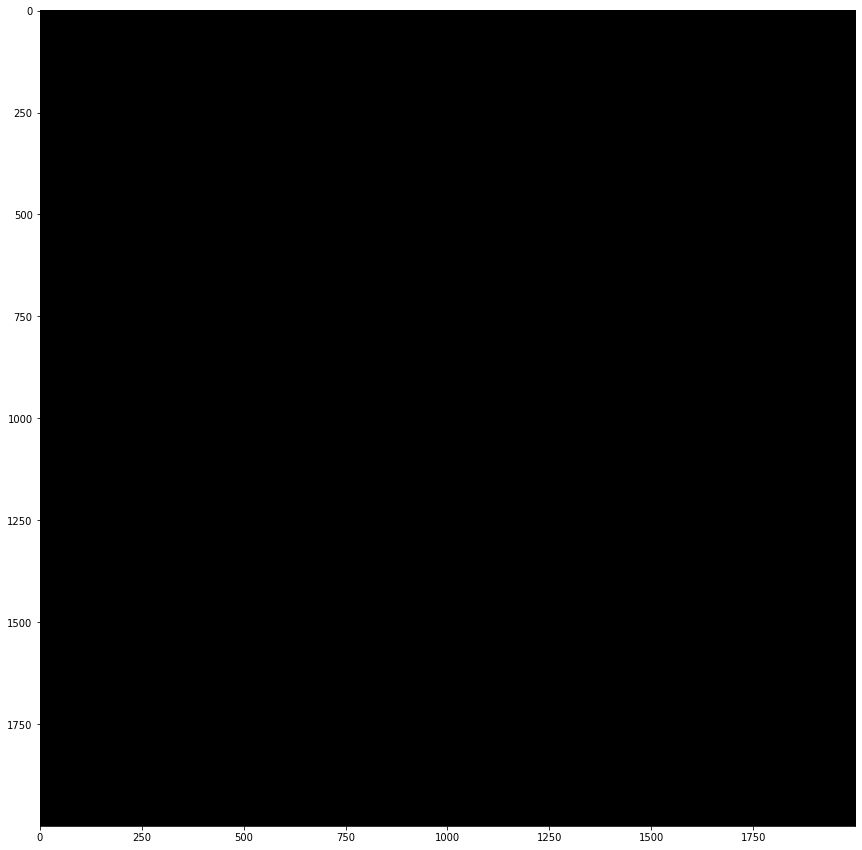

Error in callback <function flush_figures at 0x00000265F516E280> (for post_execute):


KeyboardInterrupt: 

In [52]:
#def colony_area(df,h,w):
h = 2000
w = 2000
df = x.colonies
for colony in df.mother_cell.unique():
    mask = np.zeros((h, w, 3), dtype="uint8")
    for cell in df[df.mother_cell==colony].itertuples():
        
        xloc = round(cell[5]/x.metadata['Dimensions'][0]*h*w)
        yloc = round(cell[6]/x.metadata['Dimensions'][1]*h*w)
        radius = round(cell[4]/x.metadata['Dimensions'][0]*h*w)
        
        cv2.circle(mask,center = (xloc,yloc),radius = radius,color = (255,255,255),thickness = -1)


#area = np.count_nonzero(mask)
    #return mask
#colony_area(x.colonies,2000,2000)